In [103]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from google.colab import drive
drive.mount('/content/drive')
 df = pd.read_csv('/content/drive/MyDrive/Python/Python projects/Netflix shows/netflix_titles.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
df.dropna(subset=['country'],inplace=True)

In [105]:
new_duration = df["duration"].str.split(" ", n=1, expand=True)
df["Duration"] = new_duration[0]
df["units"] = new_duration[1]
df.drop(columns=["duration"], inplace=True)

In [106]:
df['Duration']= pd.to_numeric(df.Duration, errors='coerce')
df['Duration']=df['Duration'].fillna(df['Duration'].mean())

In [107]:
df["Duration"]=df["Duration"].astype('int64')

In [108]:
df.replace(to_replace=np.nan, value=0, inplace=True)

In [202]:
df['rating'] = df['rating'].str.strip()
df['rating'] = df['rating'].str.upper()
df['rating'] = df['rating'].replace({'74 min': 'NR'})
df['rating'] = df['rating'].replace({'84 min': 'NR'})
df['rating'] = df['rating'].replace({'66 min': 'NR'})

In [109]:
df['date_added'] = df['date_added'].astype('datetime64[ns]')

In [110]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
listed_in,0


In [111]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
listed_in,object


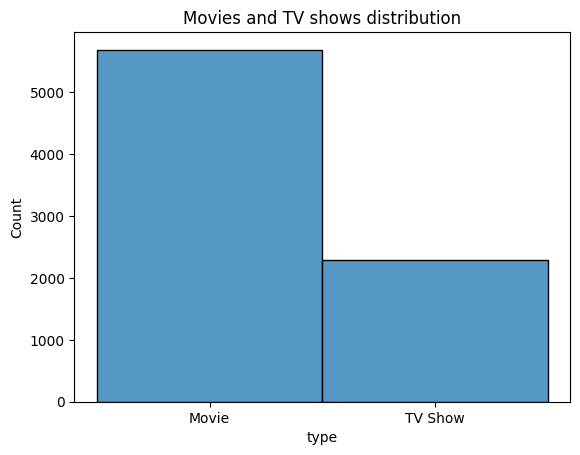

In [112]:
##distribution of movies and tv shows
sns.histplot(x='type',data = df)
plt.title('Movies and TV shows distribution')
plt.show()

In [113]:
asian_countries = [
    "Afghanistan",
    "Armenia",
    "Azerbaijan",
    "Bahrain",
    "Bangladesh",
    "Bhutan",
    "Brunei",
    "Burma (Myanmar)",
    "Cambodia",
    "China",
    "Cyprus",
    "Georgia",
    "India",
    "Indonesia",
    "Iran",
    "Iraq",
    "Israel",
    "Japan",
    "Jordan",
    "Kazakhstan",
    "Korea, North",
    "Korea, South",
    "Kuwait",
    "Kyrgyzstan",
    "Laos",
    "Lebanon",
    "Malaysia",
    "Maldives",
    "Mongolia",
    "Nepal",
    "Oman",
    "Pakistan",
    "Palestine",
    "Philippines",
    "Qatar",
    "Russia",
    "Saudi Arabia",
    "Singapore",
    "Sri Lanka",
    "Syria",
    "Tajikistan",
    "Thailand",
    "Timor-Leste",
    "Turkey",
    "Turkmenistan",
    "United Arab Emirates",
    "Uzbekistan",
    "Vietnam",
    "Yemen"
]
Asia = df[df['country'].isin(asian_countries)]
Top_genres_in_each_country = Asia.groupby(['country', 'listed_in']).size().reset_index(name='Count')
top_3_asia = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
top_3_asia.sort_values('Count',ascending=False)

<ipython-input-113-5ee142d0942f>:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_asia = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)


,country,listed_in,Count
8,India,"Comedies, Dramas, International Movies",120
9,India,"Dramas, International Movies",118
10,India,"Dramas, Independent Movies, International Movies",108
17,Japan,"Anime Series, International TV Shows",75
18,Japan,"Action & Adventure, Anime Features, Internatio...",32
49,Turkey,"Comedies, International Movies",23
34,Philippines,"Dramas, International Movies, Romantic Movies",21
11,Indonesia,"Dramas, International Movies, Romantic Movies",21
50,Turkey,"Comedies, International Movies, Romantic Movies",16
12,Indonesia,"Dramas, International Movies",15


In [114]:
african_countries = [
    "Algeria",
    "Angola",
    "Benin",
    "Botswana",
    "Burkina Faso",
    "Burundi",
    "Cabo Verde",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Comoros",
    "Congo",
    "Democratic Republic of the Congo",
    "Djibouti",
    "Egypt",
    "Equatorial Guinea",
    "Eritrea",
    "Eswatini",
    "Ethiopia",
    "Gabon",
    "Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Ivory Coast",
    "Kenya",
    "Lesotho",
    "Liberia",
    "Libya",
    "Madagascar",
    "Malawi",
    "Mali",
    "Mauritania",
    "Mauritius",
    "Morocco",
    "Mozambique",
    "Namibia",
    "Niger",
    "Nigeria",
    "Rwanda",
    "Sao Tome and Principe",
    "Senegal",
    "Seychelles",
    "Sierra Leone",
    "Somalia",
    "South Africa",
    "South Sudan",
    "Sudan",
    "Tanzania",
    "Togo",
    "Tunisia",
    "Uganda",
    "Zambia",
    "Zimbabwe"
]
Africa = df[df['country'].isin(african_countries)]
Top_genres_in_each_country = Africa.groupby(['country', 'listed_in']).size().reset_index(name='Count')
top_3_africa = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
top_3_africa.sort_values('Count',ascending=False)

<ipython-input-114-890f5be7842a>:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_africa = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)


,country,listed_in,Count
1,Egypt,"Comedies, International Movies",29
12,Nigeria,"Dramas, International Movies",19
2,Egypt,"Dramas, International Movies",12
14,Nigeria,"Dramas, International Movies, Thrillers",11
13,Nigeria,"Comedies, Dramas, International Movies",11
3,Egypt,"Comedies, International Movies, Romantic Movies",10
16,South Africa,"Comedies, International Movies, Romantic Movies",6
17,South Africa,"Dramas, International Movies",4
18,South Africa,"Comedies, Dramas, International Movies",3
4,Ghana,"Comedies, Dramas, International Movies",2


In [115]:
europe_countries = [
    "Albania",
    "Andorra",
    "Armenia",
    "Austria",
    "Azerbaijan",
    "Belarus",
    "Belgium",
    "Bosnia and Herzegovina",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Georgia",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Ireland",
    "Italy",
    "Kazakhstan",
    "Kosovo",
    "Latvia",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Moldova",
    "Monaco",
    "Montenegro",
    "Netherlands",
    "North Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Russia",
    "San Marino",
    "Serbia",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
    "Switzerland",
    "Turkey",
    "Ukraine",
    "United Kingdom",
    "Vatican City"
]
Europe = df[df['country'].isin(europe_countries)]
Top_genres_in_each_country = Europe.groupby(['country', 'listed_in']).size().reset_index(name='Count')
top_3_europe = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
top_3_europe.sort_values('Count',ascending=False)

<ipython-input-115-325f21f985fd>:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_europe = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)


,country,listed_in,Count
62,United Kingdom,Documentaries,40
63,United Kingdom,"British TV Shows, Docuseries, International TV...",27
64,United Kingdom,"British TV Shows, International TV Shows, Real...",23
57,Turkey,"Comedies, International Movies",23
58,Turkey,"Comedies, International Movies, Romantic Movies",16
...,...,...,...
13,Finland,"Kids' TV, TV Comedies",1
17,Georgia,"Documentaries, International Movies",1
39,Norway,"Action & Adventure, International Movies, Thri...",1
38,Norway,"Action & Adventure, Dramas, International Movies",1


In [116]:
americas_countries = [
    "United States",
    "Canada",
    "Mexico",
    "Guatemala",
    "Belize",
    "El Salvador",
    "Honduras",
    "Nicaragua",
    "Costa Rica",
    "Panama",
    "Bahamas",
    "Cuba",
    "Jamaica",
    "Haiti",
    "Dominican Republic",
    "Barbados",
    "Trinidad and Tobago",
    "Saint Lucia",
    "Saint Vincent and the Grenadines",
    "Grenada",
    "Antigua and Barbuda",
    "Dominica",
    "Saint Kitts and Nevis",
    "Colombia",
    "Venezuela",
    "Guyana",
    "Suriname",
    "Ecuador",
    "Peru",
    "Brazil",
    "Bolivia",
    "Paraguay",
    "Uruguay",
    "Chile",
    "Argentina"
]
Americas = df[df['country'].isin(americas_countries)]
Top_genres_in_each_country = Americas.groupby(['country', 'listed_in']).size().reset_index(name='Count')
top_3_americas = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
top_3_americas.sort_values('Count',ascending=False)

<ipython-input-116-fee3cadd6a85>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_americas = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)


,country,listed_in,Count
22,United States,Documentaries,249
23,United States,Stand-Up Comedy,209
24,United States,"Children & Family Movies, Comedies",90
16,Mexico,Stand-Up Comedy,18
17,Mexico,"Crime TV Shows, International TV Shows, Spanis...",17
6,Canada,Children & Family Movies,16
7,Canada,"Children & Family Movies, Comedies",14
12,Colombia,"Crime TV Shows, International TV Shows, Spanis...",11
3,Brazil,Stand-Up Comedy,9
0,Argentina,Stand-Up Comedy,8


In [117]:
oceanian_countries = [
    "Australia",
    "New Zealand",
    "Papua New Guinea",
    "Fiji",
    "Solomon Islands",
    "Vanuatu",
    "Samoa",
    "Kiribati",
    "Tonga",
    "Micronesia",
    "Palau",
    "Marshall Islands",
    "Tuvalu",
    "Nauru"
]
Oceanian = df[df['country'].isin(oceanian_countries)]
Top_genres_in_each_country = Oceanian.groupby(['country', 'listed_in']).size().reset_index(name='Count')
top_3_oceanian = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
top_3_oceanian.sort_values('Count',ascending=False)

<ipython-input-117-02b80522299e>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_oceanian = Top_genres_in_each_country.groupby('country').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)


,country,listed_in,Count
0,Australia,"Docuseries, International TV Shows, Science & ...",5
1,Australia,"International TV Shows, Reality TV",5
2,Australia,"Kids' TV, TV Comedies",5
3,New Zealand,Dramas,3
4,New Zealand,"Documentaries, Sports Movies",2
5,New Zealand,"Action & Adventure, Comedies, Dramas",1


In [118]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'Duration',
       'units'],
      dtype='object')

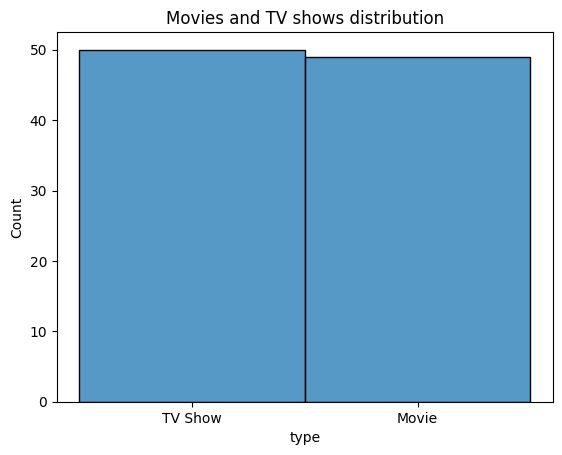

In [119]:
sns.histplot(x='type',data = Oceanian)
plt.title('Movies and TV shows distribution')
plt.show()

In [120]:
movies_duration = Oceanian[df['type'] == 'Movie']['Duration'].mean()
movies_duration

<ipython-input-120-d3c9c9c7088f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_duration = Oceanian[df['type'] == 'Movie']['Duration'].mean()


90.91836734693878

In [121]:
tv_shows_duration = Oceanian[df['type'] == 'TV Show']['Duration'].mean()
tv_shows_duration

<ipython-input-121-15f4a210282d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tv_shows_duration = Oceanian[df['type'] == 'TV Show']['Duration'].mean()


2.02

<Axes: >

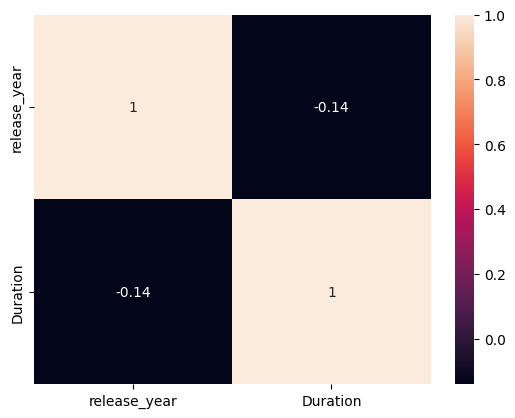

In [122]:
correlation = Oceanian[['release_year','Duration']].corr()
sns.heatmap(correlation,annot=True)

<Axes: xlabel='release_year', ylabel='Duration'>

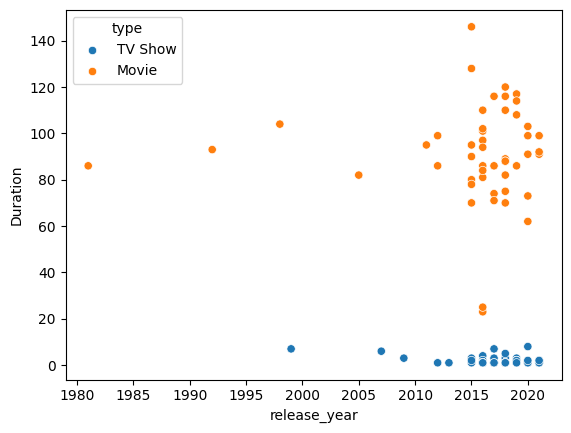

In [123]:
sns.scatterplot(x='release_year',y='Duration',data=Oceanian,hue='type')

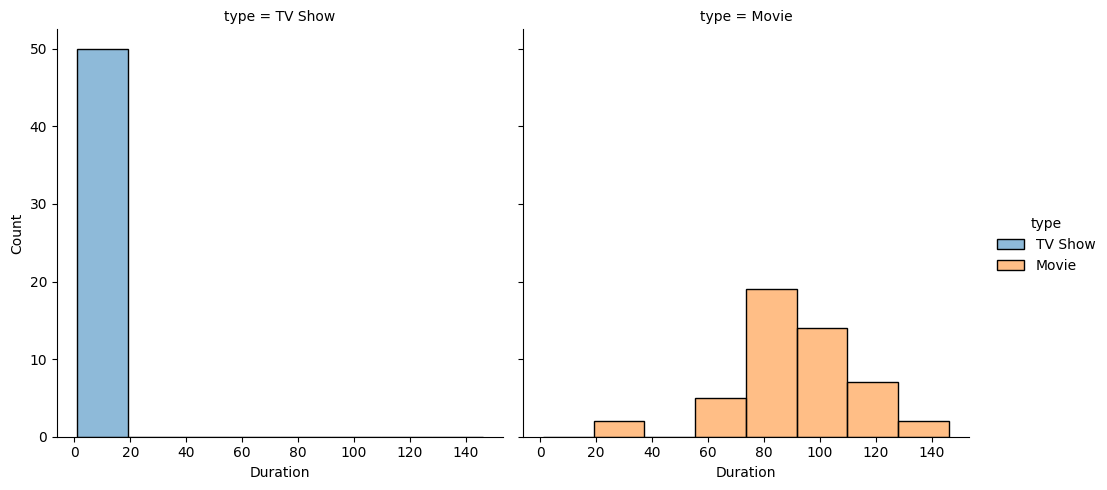

In [124]:
sns.displot(data=Oceanian, x='Duration',hue='type',col = 'type')

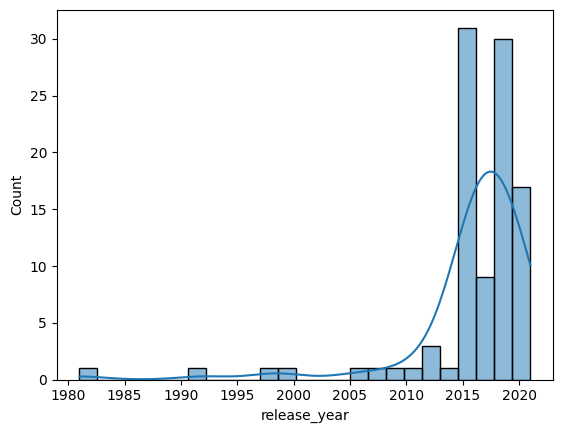

In [125]:
sns.histplot(x='release_year',data = Oceanian, bins = 25,kde=True)
plt.show()

In [126]:
countries_series = Oceanian['country'].value_counts()
top_10_countries = countries_series.head(10)
print("Top 10 countries producing the most content on Netflix:")
print(top_10_countries)

Top 10 countries producing the most content on Netflix:
country
Australia      87
New Zealand    12
Name: count, dtype: int64


In [127]:
Oceanian['date_added']= Oceanian['date_added'].astype('datetime64[ns]')

<ipython-input-127-5e7806e78cba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oceanian['date_added']= Oceanian['date_added'].astype('datetime64[ns]')


<ipython-input-128-c79cdad8df48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oceanian['year_added'] = Oceanian['date_added'].dt.year
<ipython-input-128-c79cdad8df48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oceanian['month_added'] = Oceanian['date_added'].dt.month


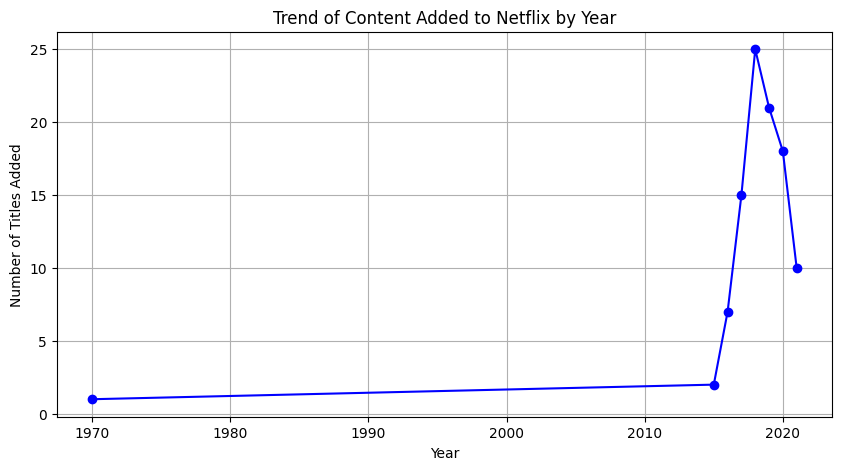

In [128]:
Oceanian['year_added'] = Oceanian['date_added'].dt.year
Oceanian['month_added'] = Oceanian['date_added'].dt.month

titles_by_year = Oceanian.groupby('year_added').size()


plt.figure(figsize=(10, 5))
plt.plot(titles_by_year.index, titles_by_year.values, marker='o',color='b')
plt.title("Trend of Content Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

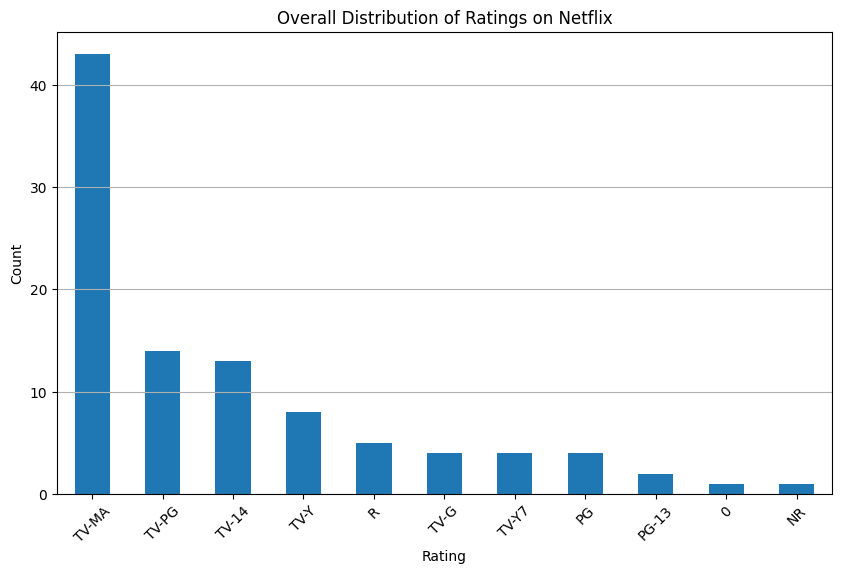

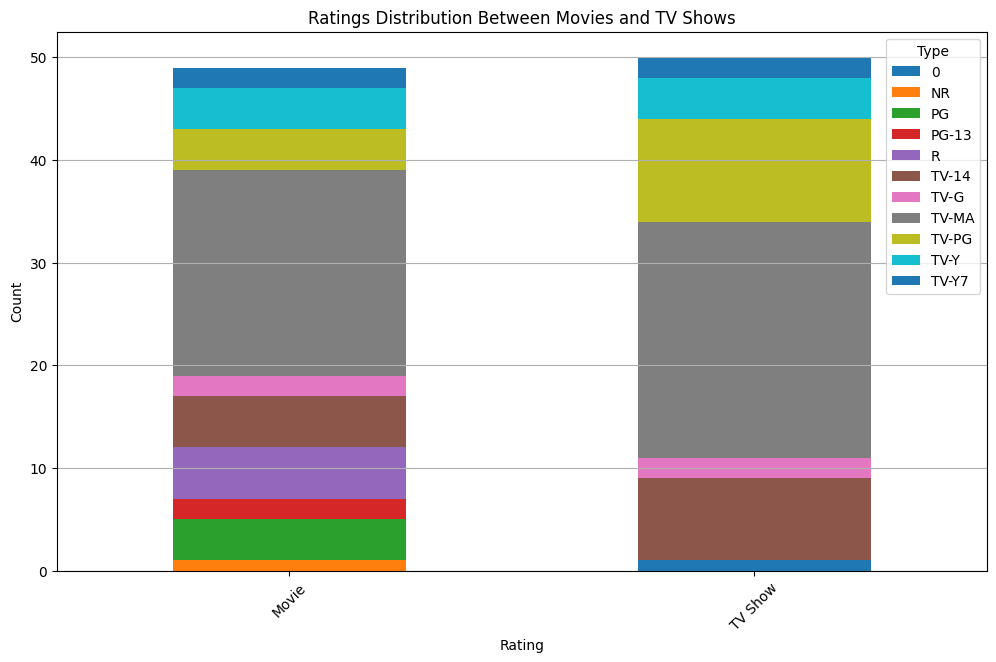

Overall Ratings Distribution:
rating
TV-MA    43
TV-PG    14
TV-14    13
TV-Y      8
R         5
TV-G      4
TV-Y7     4
PG        4
PG-13     2
0         1
NR        1
Name: count, dtype: int64

Ratings Distribution Between Movies and TV Shows:
rating   0  NR  PG  PG-13  R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  TV-Y7
type                                                                
Movie    0   1   4      2  5      5     2     20      4     4      2
TV Show  1   0   0      0  0      8     2     23     10     4      2


In [129]:
df['rating'] = df['rating'].fillna('Unknown')
ratings_distribution = Oceanian['rating'].value_counts()

ratings_by_type = Oceanian.groupby(['type', 'rating']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title("Overall Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True,axis='y')
plt.show()

# Plot the distribution by type
ratings_by_type.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Ratings Distribution Between Movies and TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.grid(True,axis='y')
plt.show()

# Display data for inspection
print("Overall Ratings Distribution:")
print(ratings_distribution)
print("\nRatings Distribution Between Movies and TV Shows:")
print(ratings_by_type)

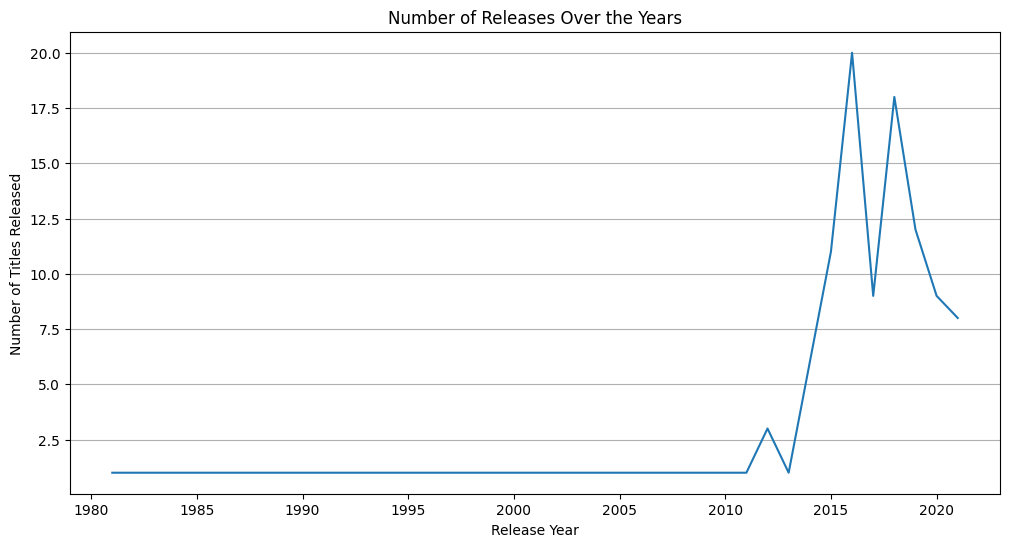

Releases by Year:
release_year
1981     1
1992     1
1998     1
1999     1
2005     1
2007     1
2009     1
2011     1
2012     3
2013     1
2015    11
2016    20
2017     9
2018    18
2019    12
2020     9
2021     8
Name: count, dtype: int64


In [130]:
# Group data by release year and count the number of titles
releases_by_year = Oceanian['release_year'].value_counts().sort_index()

# Plot the trend over the years
plt.figure(figsize=(12, 6))
plt.plot(releases_by_year.index, releases_by_year.values)
plt.title("Number of Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.grid(axis='y')
plt.show()

# Display the summary for inspection
print("Releases by Year:")
print(releases_by_year.tail(20))

<Figure size 1200x600 with 0 Axes>

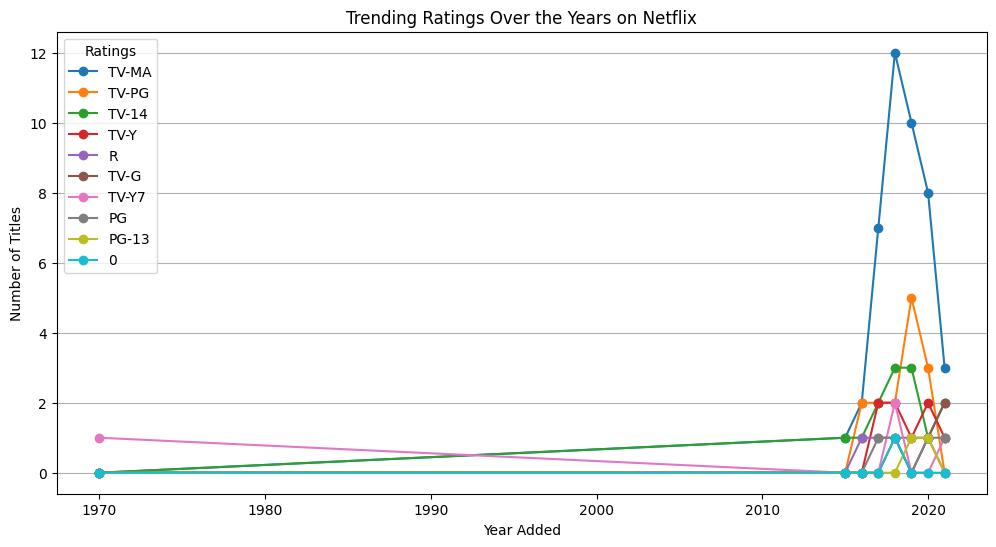

Top Trending Ratings:
rating  year_added  month_added
TV-MA   2018        12             3
        2020        7              3
        2018        6              2
TV-PG   2020        10             2
TV-MA   2019        2              2
                    7              2
        2020        11             2
        2018        7              2
TV-PG   2019        7              2
        2016        6              2
Name: count, dtype: int64


In [131]:
ratings_trend = Oceanian.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Find the most popular ratings in recent years
top_ratings = Oceanian['rating'].value_counts().head(10)

# Plot the overall trend of the most common ratings
plt.figure(figsize=(12, 6))
ratings_trend[top_ratings.index].plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Trending Ratings Over the Years on Netflix")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Ratings")
plt.grid(axis='y')
plt.show()

# Display recent trending ratings
top_ratings_year = Oceanian[['rating',"year_added",'month_added']].value_counts().head(10)
print("Top Trending Ratings:")
print(top_ratings_year)

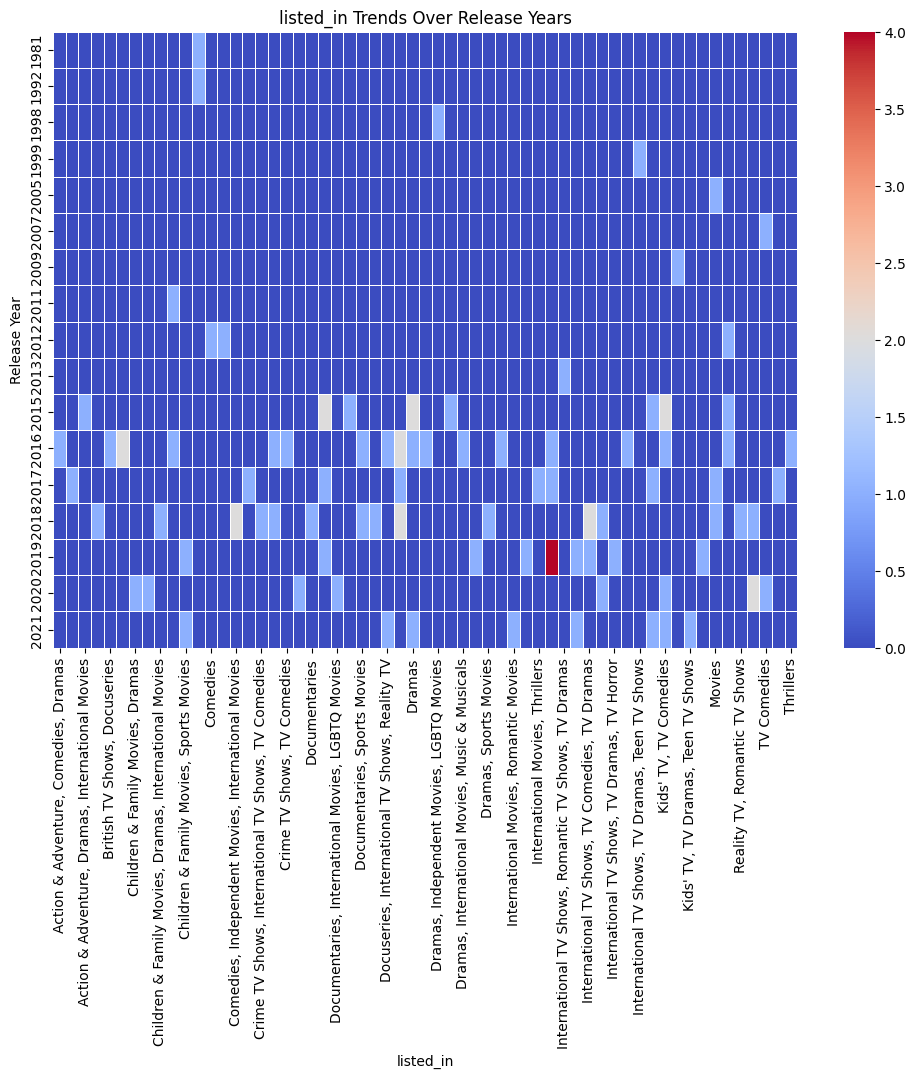

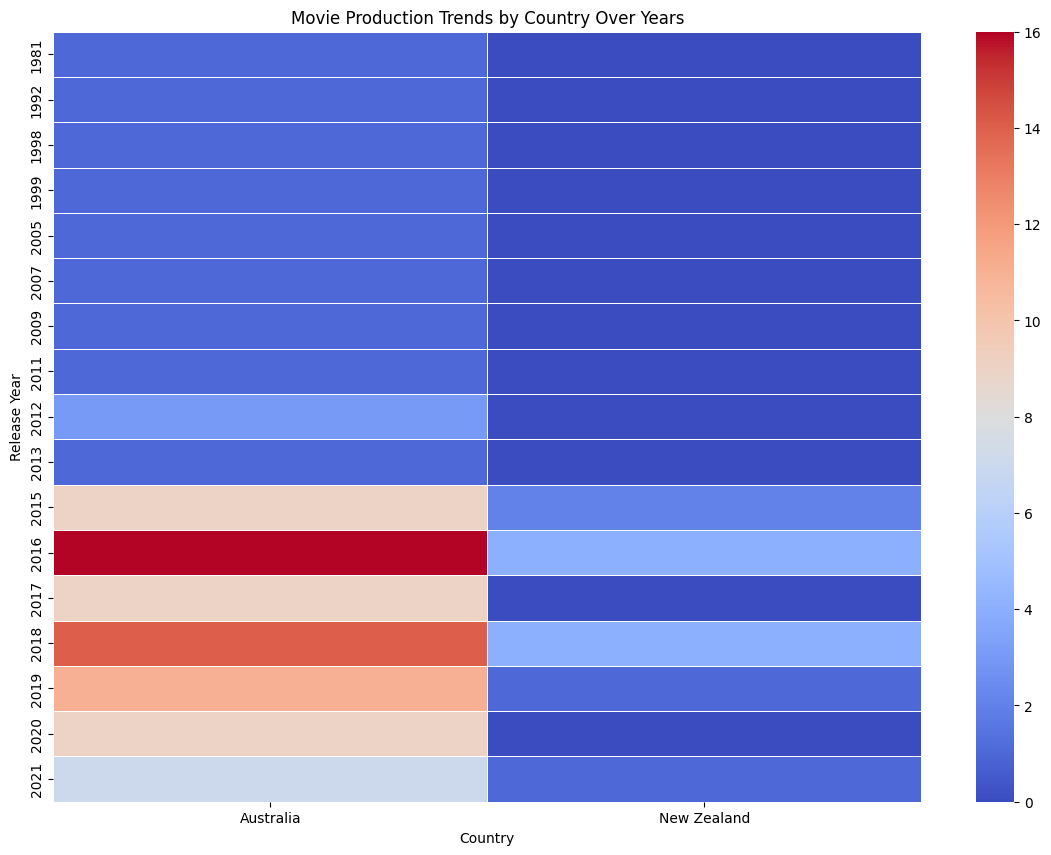

In [132]:
Oceanian.dropna(subset=['release_year', 'country', 'listed_in'])

# Normalize multiple genres per movie
Oceanian['listed_in'].str.split(', ')

# Group by country, release year, and genre to count titles
genre_trends = Oceanian.groupby(['country', 'release_year', 'listed_in']).size().reset_index(name='count')

# Create a pivot table for heatmap visualization
heatmap_data = genre_trends.pivot_table(index='release_year', columns='listed_in', values='count', aggfunc='sum', fill_value=0)

# Plot heatmap of genre trends over years
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title("listed_in Trends Over Release Years")
plt.xlabel("listed_in")
plt.ylabel("Release Year")
plt.show()

# Correlation between release year and number of movies per country
country_trends = Oceanian.groupby(['release_year', 'country']).size().reset_index(name='count')

# Pivot table for country vs. release year
country_heatmap = country_trends.pivot_table(index='release_year', columns='country', values='count', fill_value=0)

# Plot heatmap for country trends
plt.figure(figsize=(14, 10))
sns.heatmap(country_heatmap, cmap='coolwarm', linewidths=0.5)
plt.title("Movie Production Trends by Country Over Years")
plt.xlabel("Country")
plt.ylabel("Release Year")
plt.show()

In [133]:
##########Americas##########


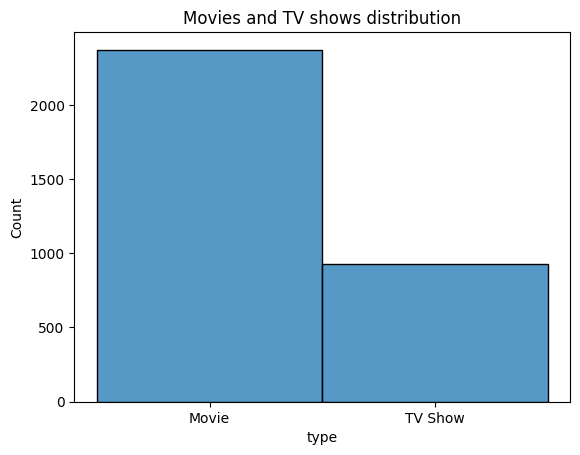

In [134]:
sns.histplot(x='type',data = Americas)
plt.title('Movies and TV shows distribution')
plt.show()

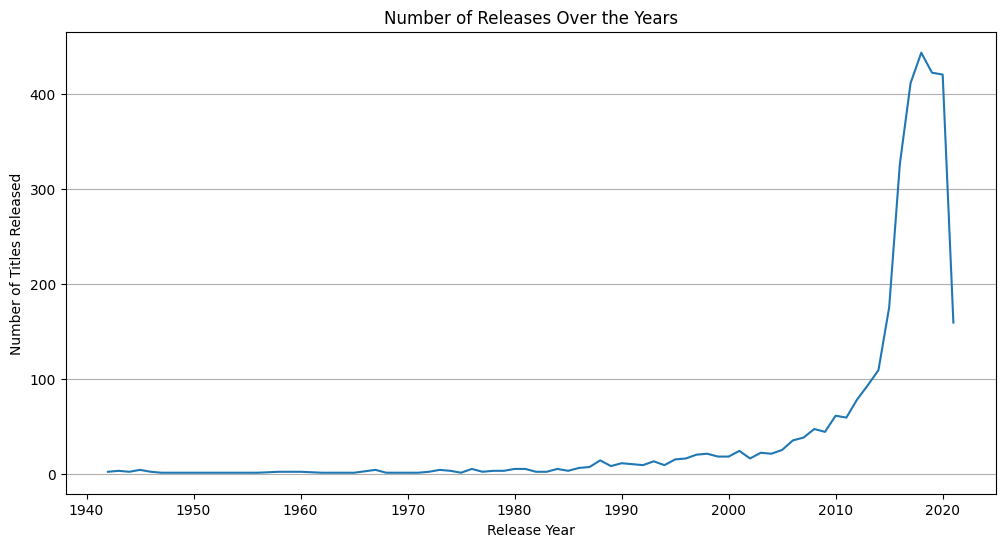

Releases by Year:
release_year
2002     16
2003     22
2004     21
2005     25
2006     35
2007     38
2008     47
2009     44
2010     61
2011     59
2012     78
2013     93
2014    109
2015    175
2016    326
2017    411
2018    443
2019    422
2020    420
2021    159
Name: count, dtype: int64


In [135]:
# Group data by release year and count the number of titles
releases_by_year = Americas['release_year'].value_counts().sort_index()

# Plot the trend over the years
plt.figure(figsize=(12, 6))
plt.plot(releases_by_year.index, releases_by_year.values)
plt.title("Number of Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.grid(axis='y')
plt.show()

# Display the summary for inspection
print("Releases by Year:")
print(releases_by_year.tail(20))

In [136]:
countries_series = Americas['country'].value_counts()
top_10_countries = countries_series.head(10)
print("Top 10 countries producing the most content on Netflix:")
print(top_10_countries)

Top 10 countries producing the most content on Netflix:
country
United States    2818
Canada            181
Mexico            110
Brazil             77
Argentina          56
Colombia           35
Chile              14
Peru                4
Uruguay             3
Venezuela           1
Name: count, dtype: int64


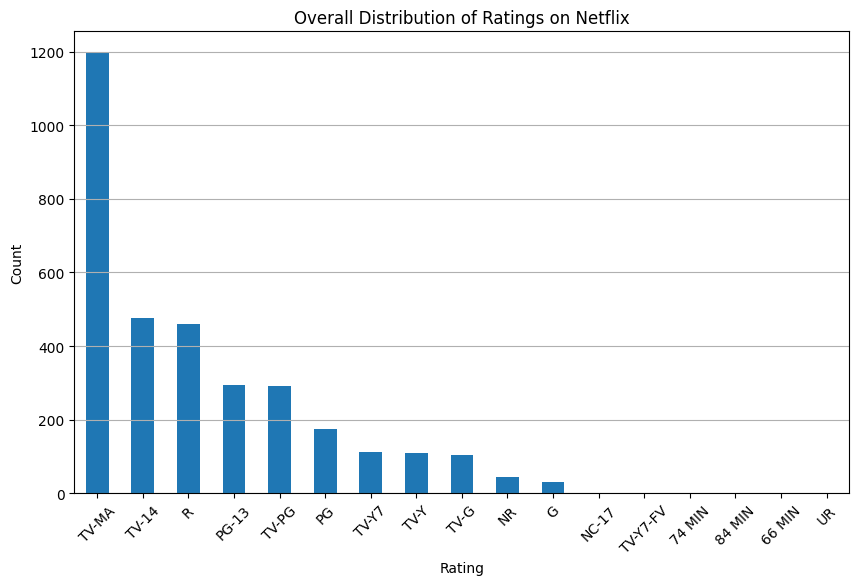

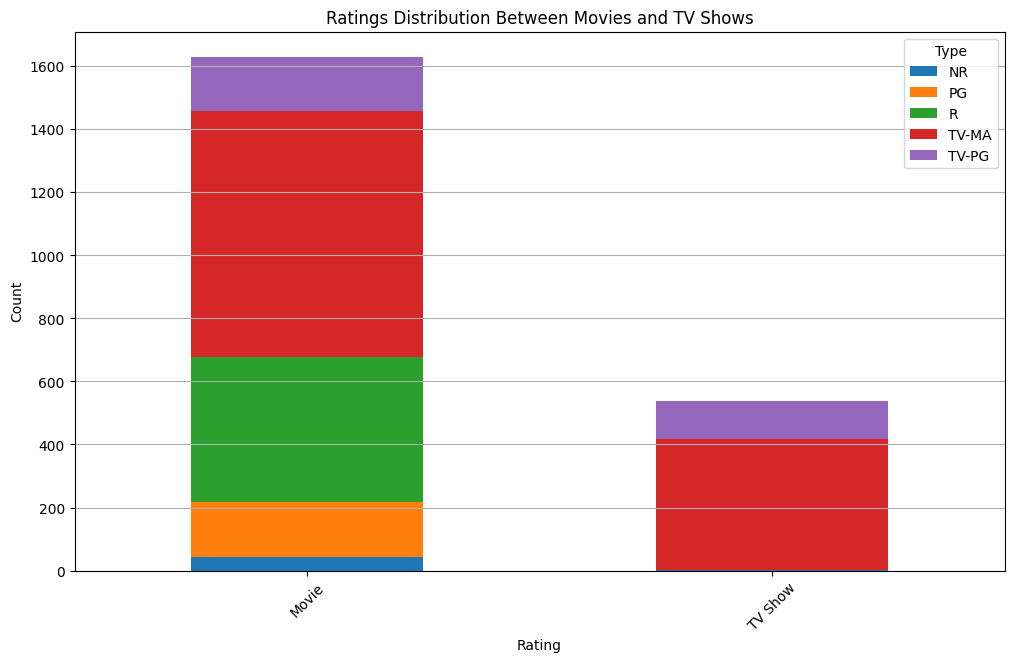

Overall Ratings Distribution:
rating
TV-MA       1195
TV-14        476
R            461
PG-13        294
TV-PG        291
PG           174
TV-Y7        113
TV-Y         109
TV-G         104
NR            45
G             30
NC-17          2
TV-Y7-FV       2
74 MIN         1
84 MIN         1
66 MIN         1
UR             1
Name: count, dtype: int64

Ratings Distribution Between Movies and TV Shows:
rating   NR   PG    R  TV-MA  TV-PG
type                               
Movie    43  174  461    780    170
TV Show   2    0    0    415    121


In [208]:
Americas['rating'] = Americas['rating'].str.strip()
Americas['rating'] = Americas['rating'].str.upper()
Americas['rating'] = Americas['rating'].replace({'74min':'NR'})
Americas['rating'] = Americas['rating'].replace({'84min':'NR'})
Americas['rating'] = Americas['rating'].replace({'66min':'NR'})

ratings_distribution = Americas['rating'].value_counts()

valid_ratings = ['TV-MA', 'TV-PG', 'PG', 'R', 'NR']
Americas = Americas[Americas['rating'].isin(valid_ratings)]
ratings_by_type = Americas.groupby(['type', 'rating']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title("Overall Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True,axis='y')
plt.show()

# Plot the distribution by type
ratings_by_type.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Ratings Distribution Between Movies and TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.grid(True,axis='y')
plt.show()

# Display data for inspection
print("Overall Ratings Distribution:")
print(ratings_distribution)
print("\nRatings Distribution Between Movies and TV Shows:")
print(ratings_by_type)

In [138]:
Americas['date_added']= Americas['date_added'].astype('datetime64[ns]')

<ipython-input-138-8beeeed3d4d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Americas['date_added']= Americas['date_added'].astype('datetime64[ns]')


<ipython-input-139-63e47d585f2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Americas['year_added'] = Americas['date_added'].dt.year
<ipython-input-139-63e47d585f2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Americas['month_added'] = Americas['date_added'].dt.month


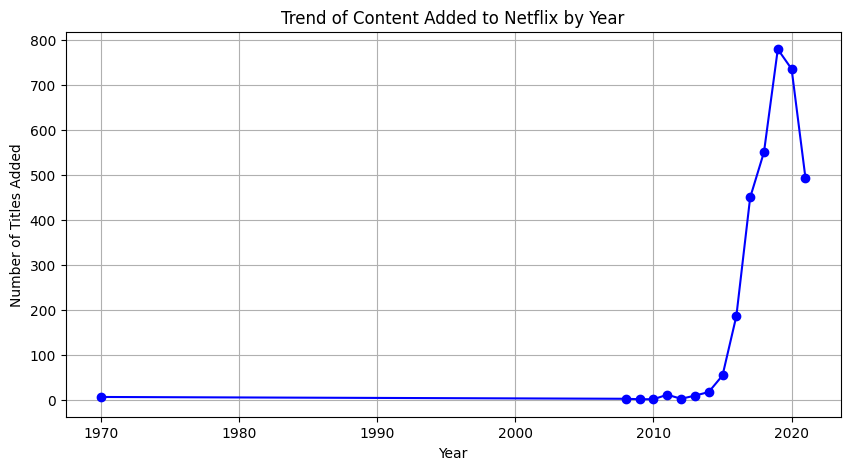

In [139]:
Americas['year_added'] = Americas['date_added'].dt.year
Americas['month_added'] = Americas['date_added'].dt.month

titles_by_year = Americas.groupby('year_added').size()


plt.figure(figsize=(10, 5))
plt.plot(titles_by_year.index, titles_by_year.values, marker='o',color='b')
plt.title("Trend of Content Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

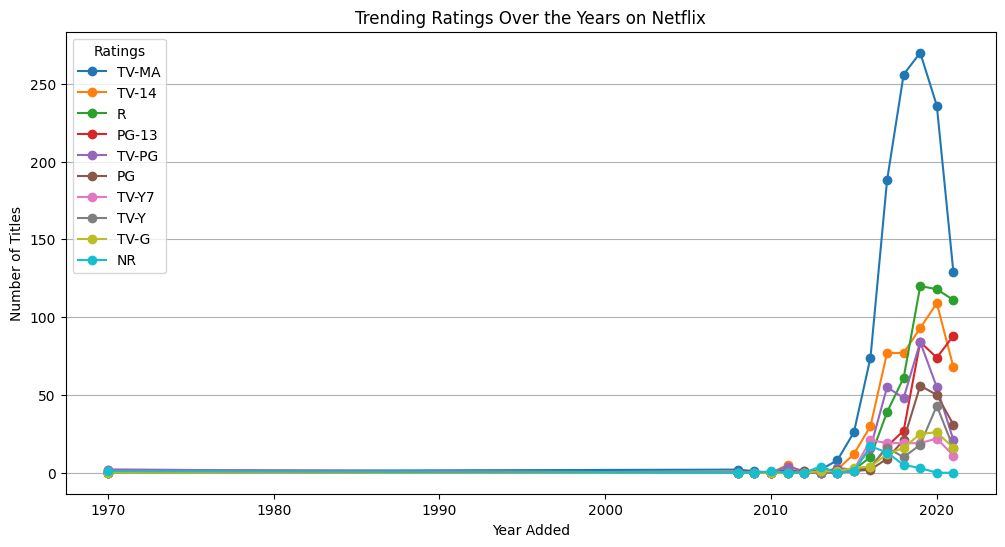

Top Trending Ratings:
rating  year_added  month_added
R       2019        11             36
TV-MA   2018        3              32
                    12             31
        2019        6              28
                    4              28
        2021        6              27
        2019        11             27
                    8              27
R       2020        1              27
TV-MA   2020        3              27
Name: count, dtype: int64


In [140]:
ratings_trend = Americas.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Find the most popular ratings in recent years
top_ratings = Americas['rating'].value_counts().head(10)
Americas['rating'].replace(to_replace='NR',value=np.nan)
Americas = Americas.dropna(subset=['rating'])
# Plot the overall trend of the most common ratings
plt.figure(figsize=(12, 6))
ratings_trend[top_ratings.index].plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Trending Ratings Over the Years on Netflix")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Ratings")
plt.grid(axis='y')
plt.show()

# Display recent trending ratings
top_ratings_year = Americas[['rating',"year_added",'month_added']].value_counts().head(10)
print("Top Trending Ratings:")
print(top_ratings_year)

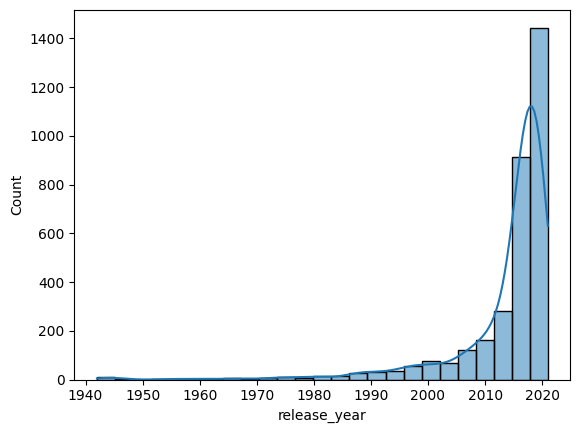

In [141]:
sns.histplot(x='release_year',data = Americas, bins = 25,kde=True)
plt.show()

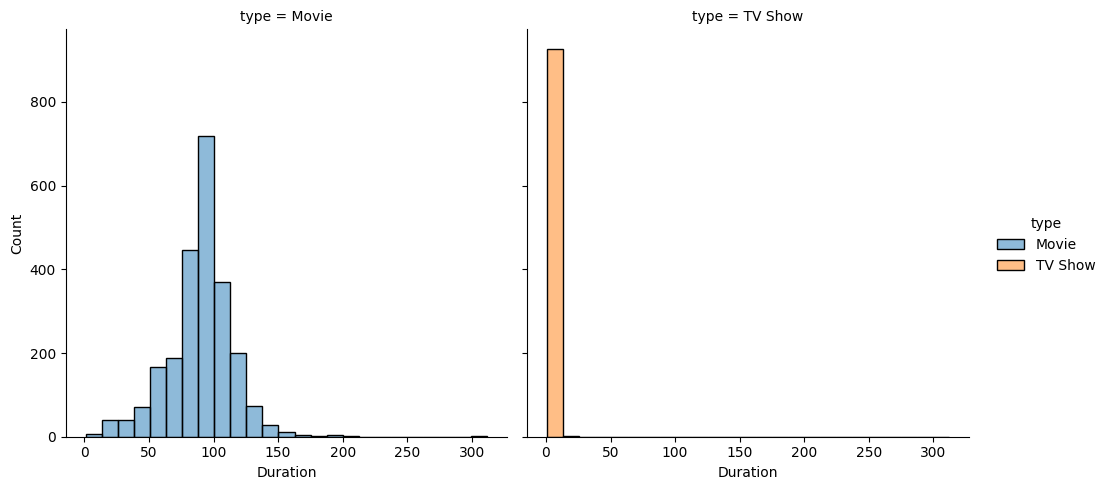

In [142]:
sns.displot(data=Americas, x='Duration',hue='type',col = 'type')

<Axes: xlabel='release_year', ylabel='Duration'>

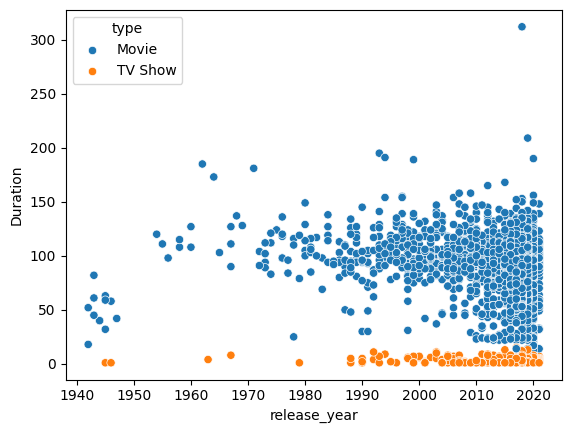

In [143]:
sns.scatterplot(x='release_year',y='Duration',data=Americas,hue='type')

<Axes: >

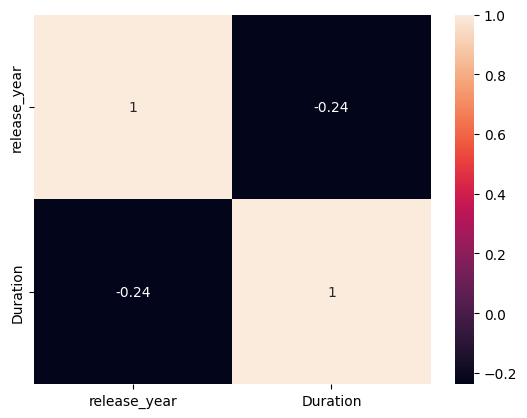

In [144]:
correlation = Americas[['release_year','Duration']].corr()
sns.heatmap(correlation,annot=True)

In [145]:
tv_shows_duration = Americas[df['type'] == 'TV Show']['Duration'].mean()
tv_shows_duration

<ipython-input-145-c2fe686c6cd1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tv_shows_duration = Americas[df['type'] == 'TV Show']['Duration'].mean()


2.22497308934338

In [146]:
movies_duration = Americas[df['type'] == 'Movie']['Duration'].mean()
movies_duration

<ipython-input-146-bba80fcd522d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_duration = Americas[df['type'] == 'Movie']['Duration'].mean()


89.92619148038803

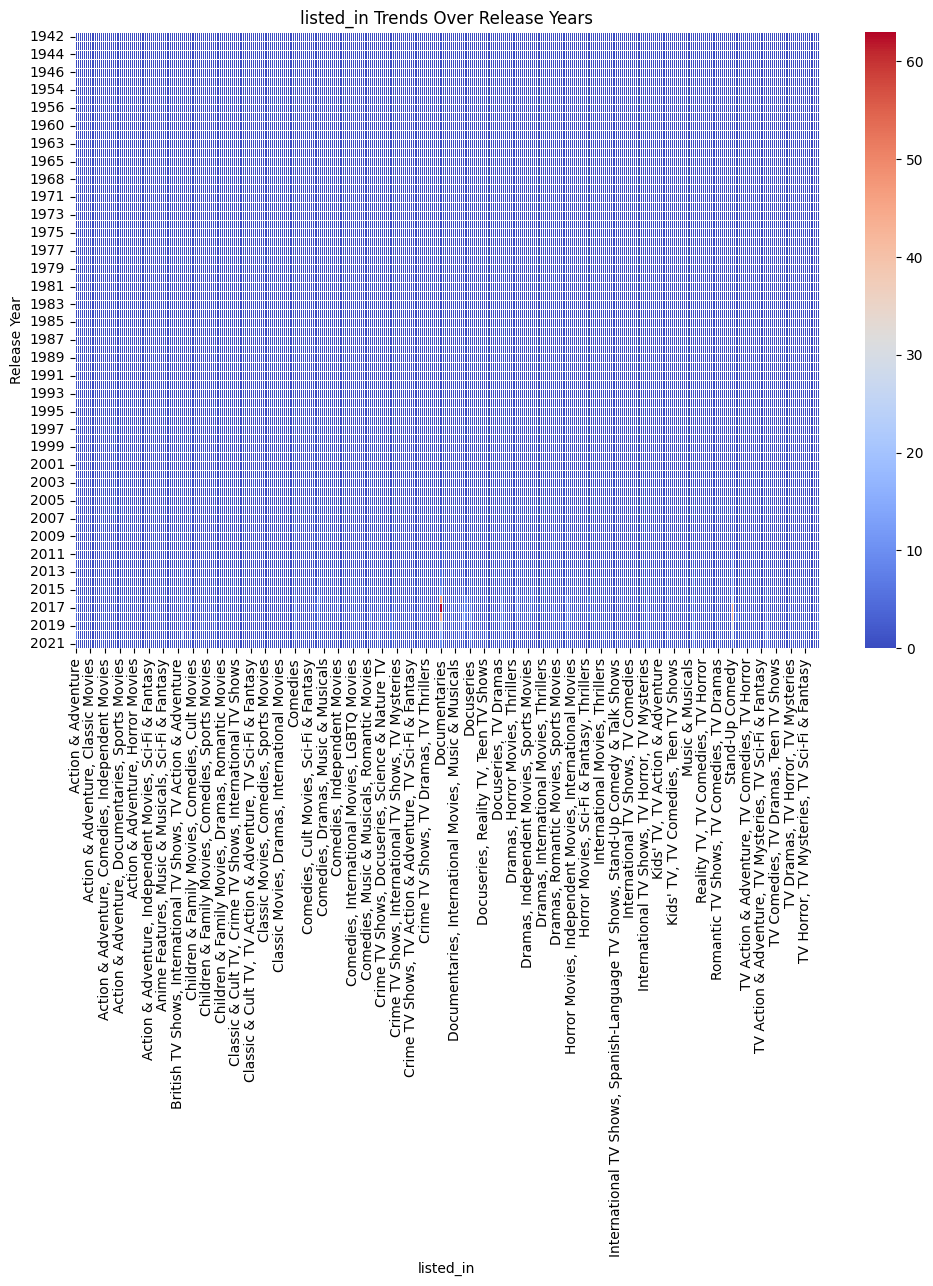

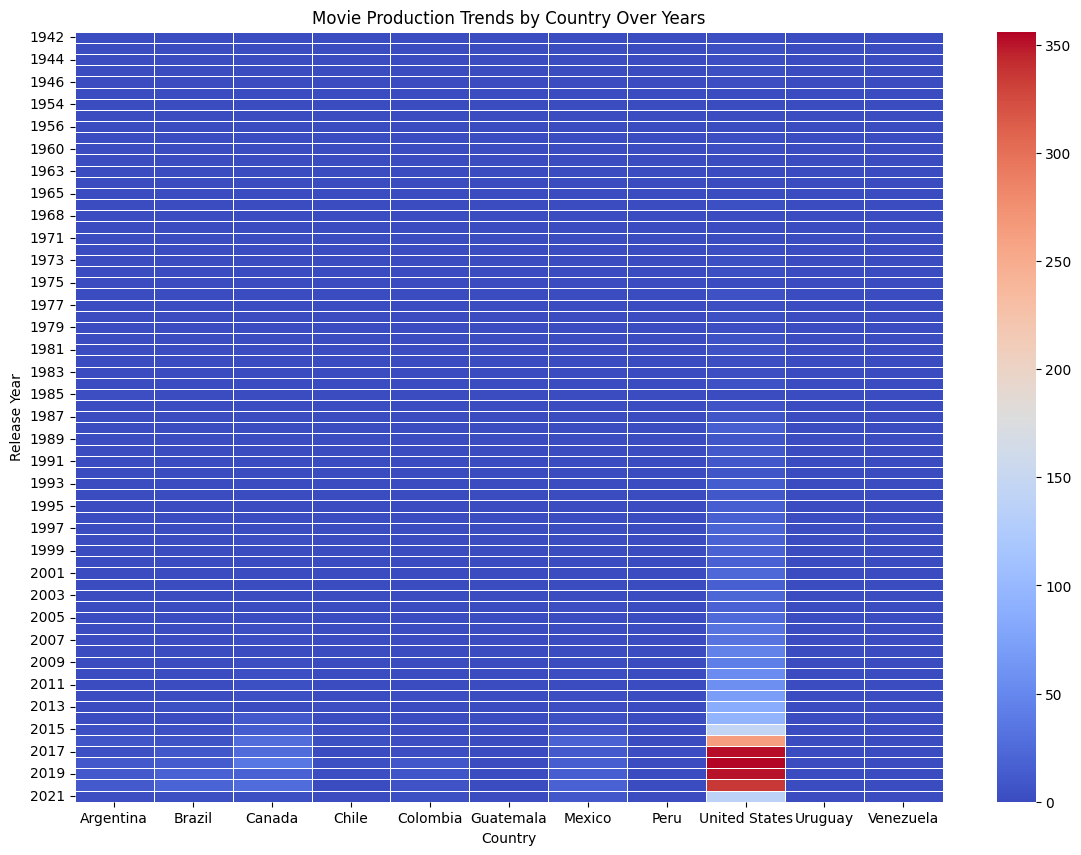

In [147]:
Americas.dropna(subset=['release_year', 'country', 'listed_in'])

# Normalize multiple genres per movie
Americas['listed_in'].str.split(', ')

# Group by country, release year, and genre to count titles
genre_trends = Americas.groupby(['country', 'release_year', 'listed_in']).size().reset_index(name='count')

# Create a pivot table for heatmap visualization
heatmap_data = genre_trends.pivot_table(index='release_year', columns='listed_in', values='count', aggfunc='sum', fill_value=0)

# Plot heatmap of genre trends over years
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title("listed_in Trends Over Release Years")
plt.xlabel("listed_in")
plt.ylabel("Release Year")
plt.show()

# Correlation between release year and number of movies per country
country_trends = Americas.groupby(['release_year', 'country']).size().reset_index(name='count')

# Pivot table for country vs. release year
country_heatmap = country_trends.pivot_table(index='release_year', columns='country', values='count', fill_value=0)

# Plot heatmap for country trends
plt.figure(figsize=(14, 10))
sns.heatmap(country_heatmap, cmap='coolwarm', linewidths=0.5)
plt.title("Movie Production Trends by Country Over Years")
plt.xlabel("Country")
plt.ylabel("Release Year")
plt.show()

In [148]:
##########Europe############


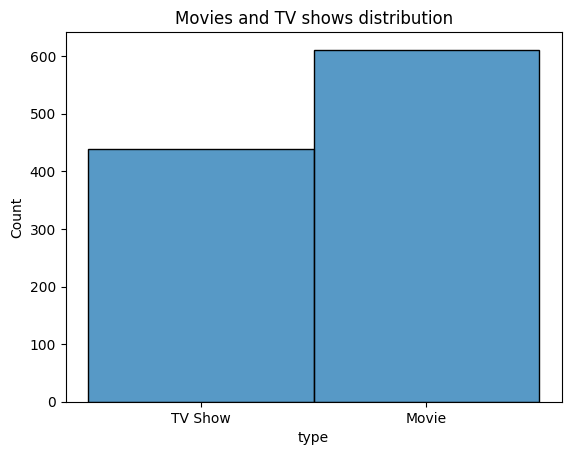

In [149]:
sns.histplot(x='type',data = Europe)
plt.title('Movies and TV shows distribution')
plt.show()

In [150]:
movies_duration = Europe[df['type'] == 'Movie']['Duration'].mean()
movies_duration

<ipython-input-150-4afacea2808a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_duration = Europe[df['type'] == 'Movie']['Duration'].mean()


93.68248772504091

In [151]:
tv_shows_duration = Europe[df['type'] == 'TV Show']['Duration'].mean()
tv_shows_duration

<ipython-input-151-5e5869060f2e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tv_shows_duration = Europe[df['type'] == 'TV Show']['Duration'].mean()


1.7220956719817768

<Axes: >

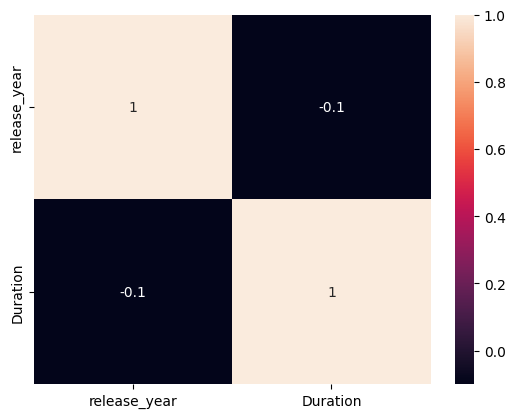

In [152]:
correlation = Europe[['release_year','Duration']].corr()
sns.heatmap(correlation,annot=True)

<Axes: xlabel='release_year', ylabel='Duration'>

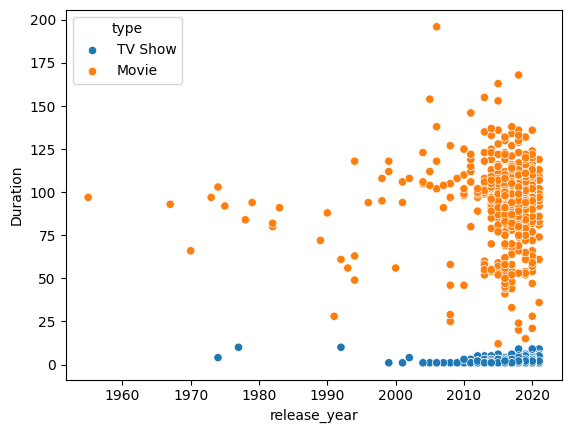

In [153]:
sns.scatterplot(x='release_year',y='Duration',data=Europe,hue='type')

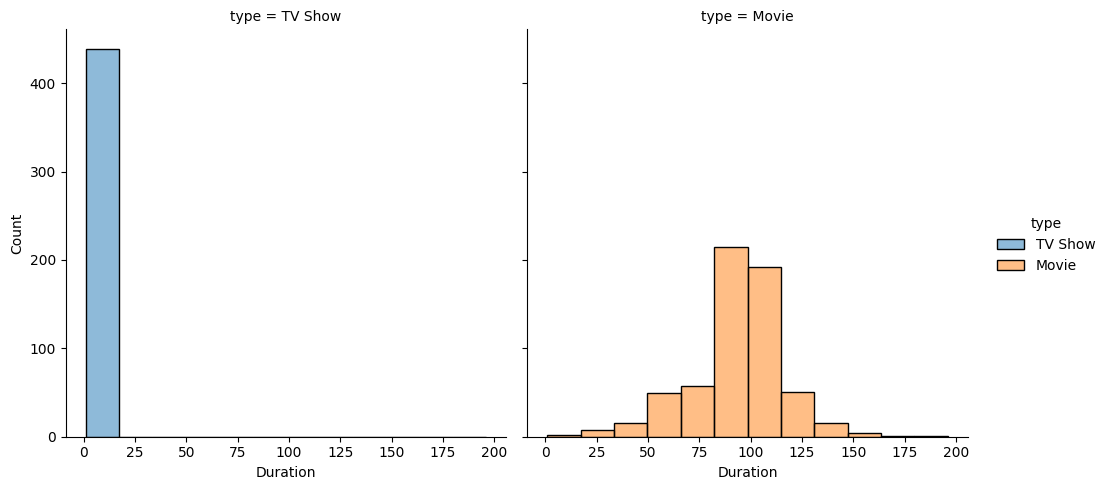

In [154]:
sns.displot(data=Europe, x='Duration',hue='type',col = 'type')

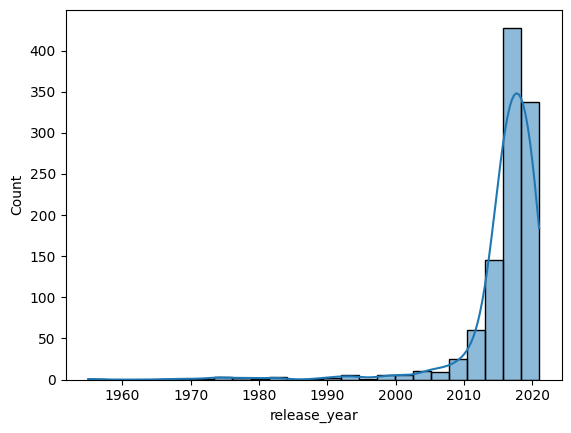

In [155]:
sns.histplot(x='release_year',data = Europe, bins = 25,kde=True)
plt.show()

In [156]:
Europe['date_added']= Europe['date_added'].astype('datetime64[ns]')

<ipython-input-156-1911829a75dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe['date_added']= Europe['date_added'].astype('datetime64[ns]')


<ipython-input-157-2c3c87b574e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe['year_added'] = Europe['date_added'].dt.year
<ipython-input-157-2c3c87b574e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe['month_added'] = Europe['date_added'].dt.month


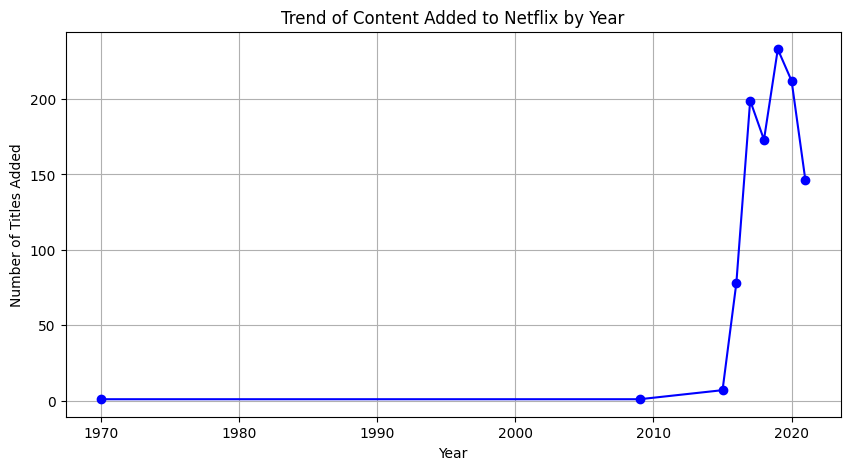

In [157]:
Europe['year_added'] = Europe['date_added'].dt.year
Europe['month_added'] = Europe['date_added'].dt.month

titles_by_year = Europe.groupby('year_added').size()


plt.figure(figsize=(10, 5))
plt.plot(titles_by_year.index, titles_by_year.values, marker='o',color='b')
plt.title("Trend of Content Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

<ipython-input-158-24a0120c3963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe['rating'] = Europe['rating'].fillna('Unknown')


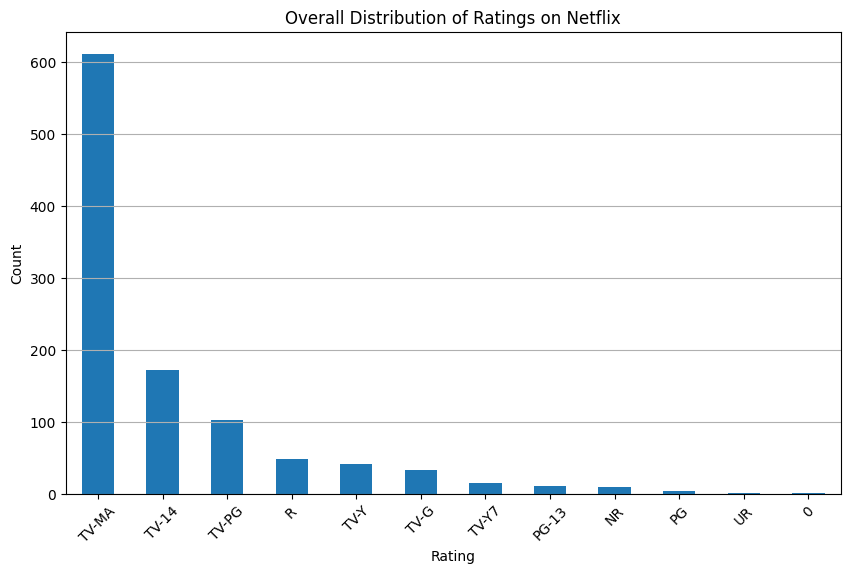

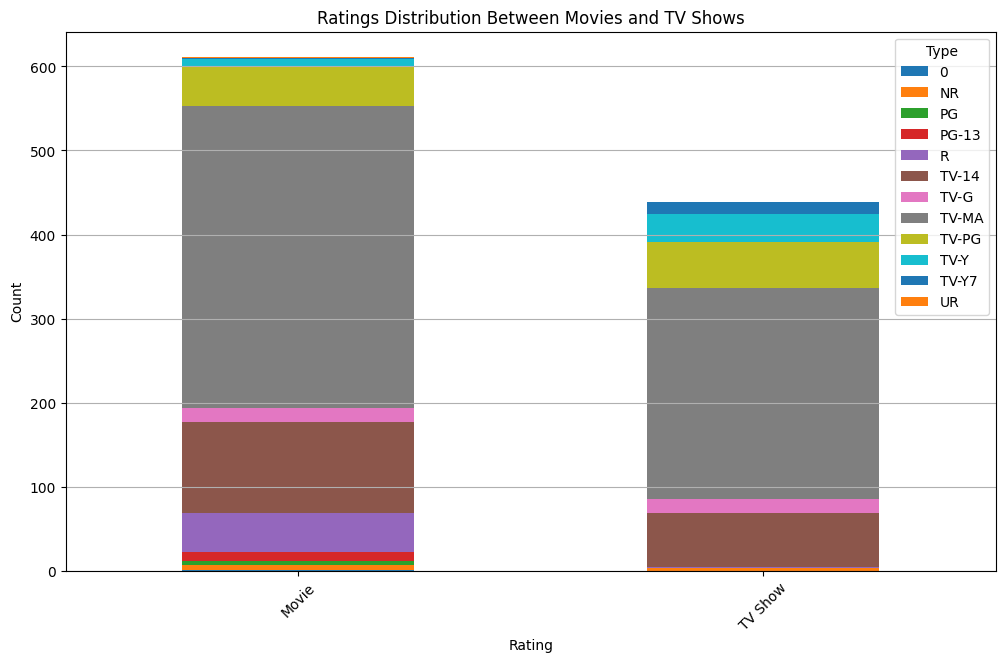

Overall Ratings Distribution:
rating
TV-MA    611
TV-14    172
TV-PG    103
R         48
TV-Y      42
TV-G      33
TV-Y7     15
PG-13     11
NR         9
PG         4
UR         1
0          1
Name: count, dtype: int64

Ratings Distribution Between Movies and TV Shows:
rating   0  NR  PG  PG-13   R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  TV-Y7  UR
type                                                                     
Movie    1   6   4     11  47    108    16    360     48     8      1   1
TV Show  0   3   0      0   1     64    17    251     55    34     14   0


In [158]:
Europe['rating'] = Europe['rating'].fillna('Unknown')
ratings_distribution = Europe['rating'].value_counts()

ratings_by_type = Europe.groupby(['type', 'rating']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title("Overall Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True,axis='y')
plt.show()

# Plot the distribution by type
ratings_by_type.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Ratings Distribution Between Movies and TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.grid(True,axis='y')
plt.show()

# Display data for inspection
print("Overall Ratings Distribution:")
print(ratings_distribution)
print("\nRatings Distribution Between Movies and TV Shows:")
print(ratings_by_type)

In [159]:
countries_series = Europe['country'].value_counts()
top_10_countries = countries_series.head(10)
print("Top 10 countries producing the most content on Netflix:")
print(top_10_countries)

Top 10 countries producing the most content on Netflix:
country
United Kingdom    419
Spain             145
France            124
Turkey            105
Germany            67
Italy              45
Poland             24
Netherlands        19
Russia             15
Sweden             13
Name: count, dtype: int64


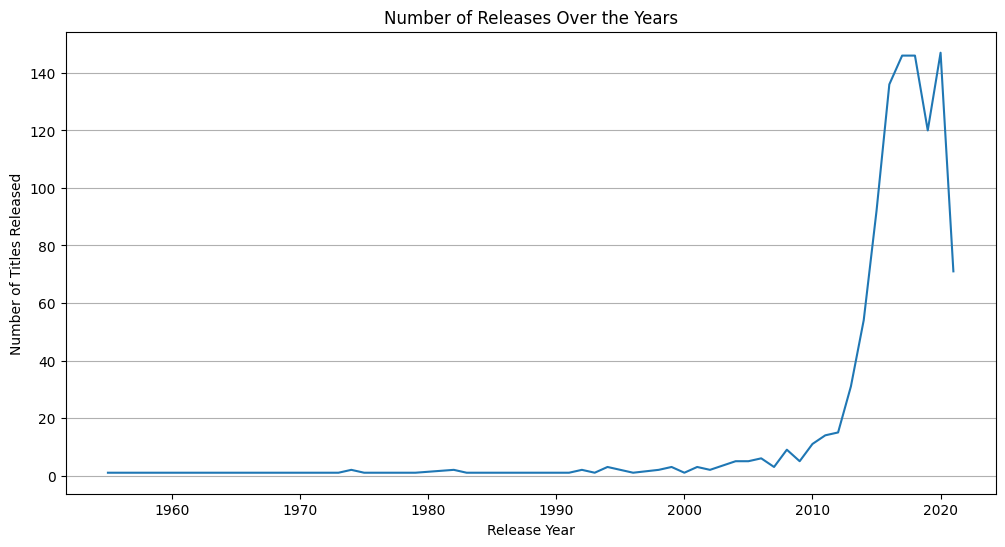

Releases by Year:
release_year
2001      3
2002      2
2004      5
2005      5
2006      6
2007      3
2008      9
2009      5
2010     11
2011     14
2012     15
2013     31
2014     54
2015     92
2016    136
2017    146
2018    146
2019    120
2020    147
2021     71
Name: count, dtype: int64


In [160]:
# Group data by release year and count the number of titles
releases_by_year = Europe['release_year'].value_counts().sort_index()

# Plot the trend over the years
plt.figure(figsize=(12, 6))
plt.plot(releases_by_year.index, releases_by_year.values)
plt.title("Number of Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.grid(axis='y')
plt.show()

# Display the summary for inspection
print("Releases by Year:")
print(releases_by_year.tail(20))

<Figure size 1200x600 with 0 Axes>

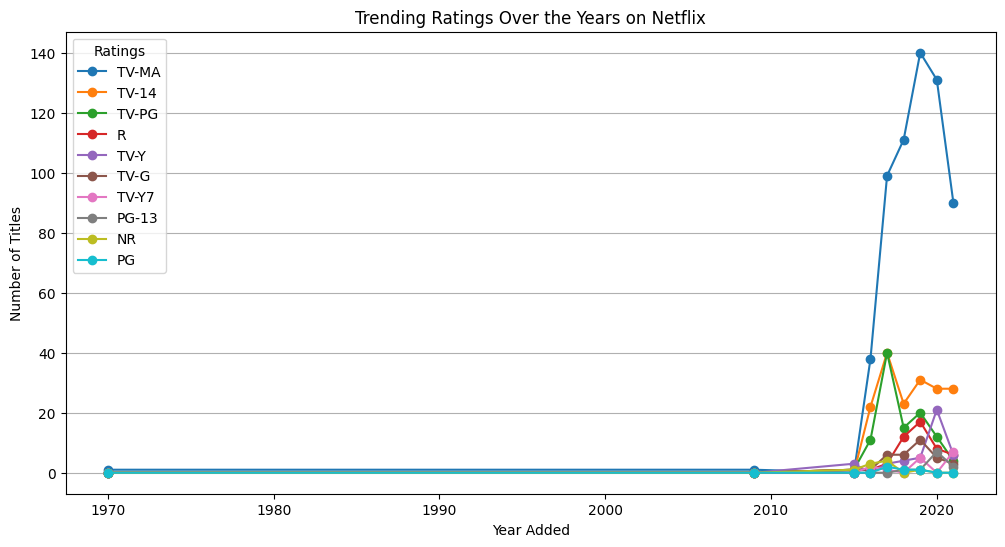

Top Trending Ratings:
rating  year_added  month_added
TV-MA   2019        10             21
        2020        9              20
                    4              19
        2019        2              17
        2017        3              17
        2018        12             16
        2021        4              16
        2019        11             15
        2020        3              14
                    7              14
        2021        2              14
                    6              14
TV-PG   2017        3              14
TV-MA   2018        4              13
Name: count, dtype: int64


In [195]:
ratings_trend = Europe.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Find the most popular ratings in recent years
top_ratings = Europe['rating'].value_counts().head(10)

# Plot the overall trend of the most common ratings
plt.figure(figsize=(12, 6))
ratings_trend[top_ratings.index].plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Trending Ratings Over the Years on Netflix")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Ratings")
plt.grid(axis='y')
plt.show()

# Display recent trending ratings
top_ratings_year = Europe[['rating',"year_added",'month_added']].value_counts().head(14)
print("Top Trending Ratings:")
print(top_ratings_year)

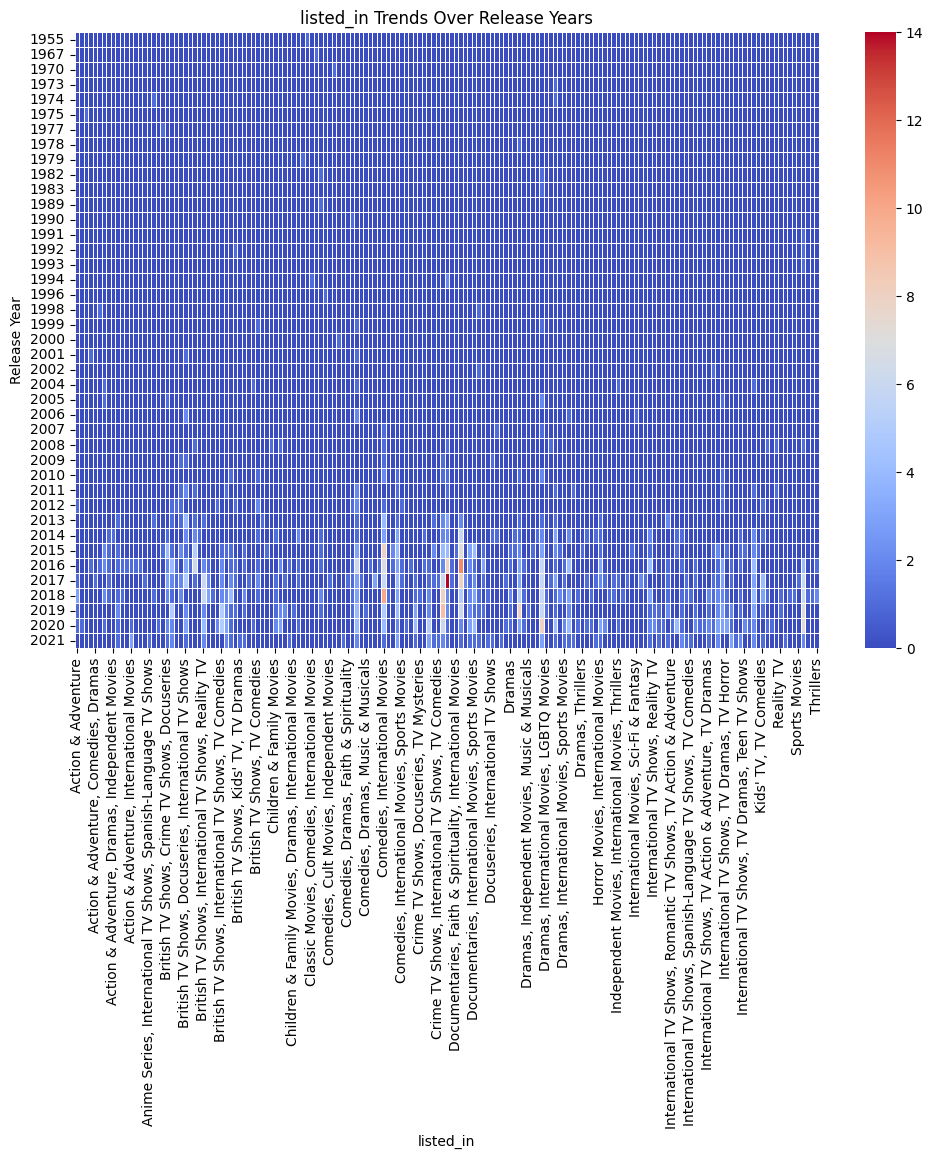

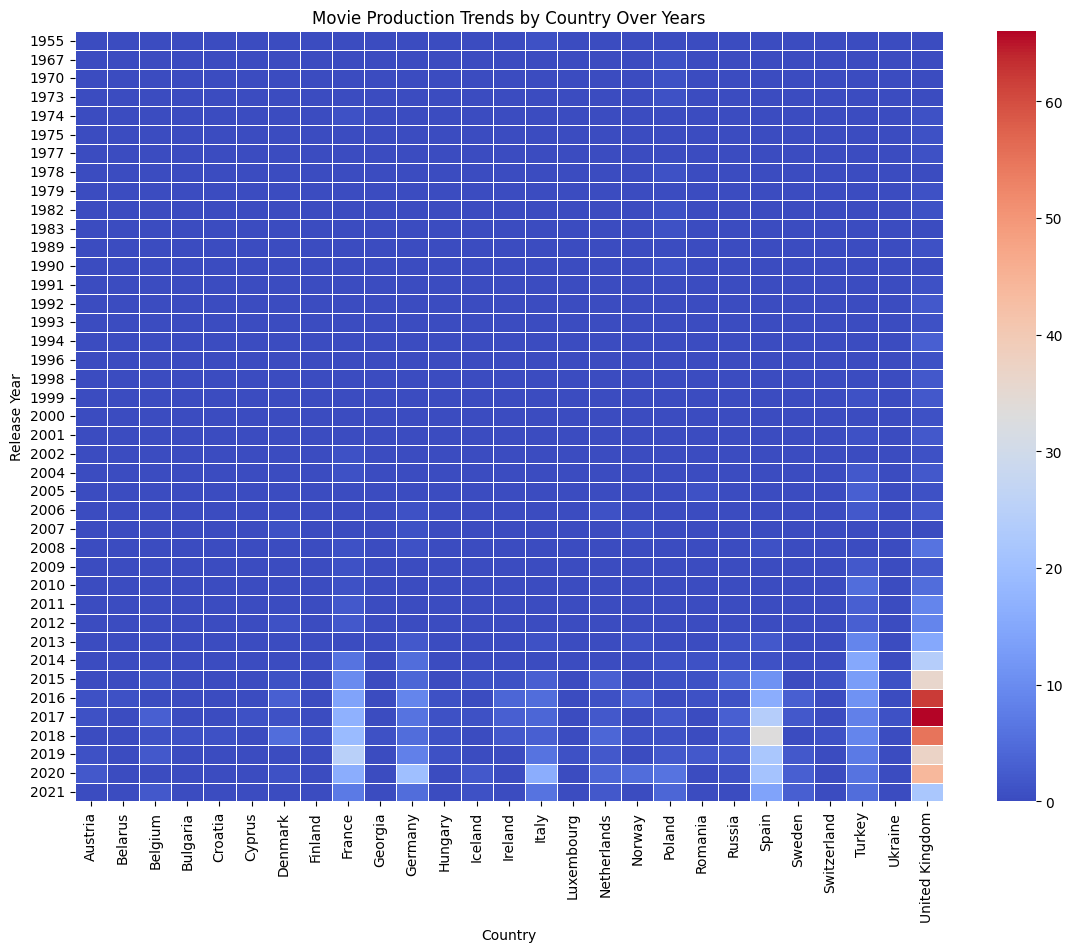

In [162]:
Europe.dropna(subset=['release_year', 'country', 'listed_in'])

# Normalize multiple genres per movie
Europe['listed_in'].str.split(', ')

# Group by country, release year, and genre to count titles
genre_trends = Europe.groupby(['country', 'release_year', 'listed_in']).size().reset_index(name='count')

# Create a pivot table for heatmap visualization
heatmap_data = genre_trends.pivot_table(index='release_year', columns='listed_in', values='count', aggfunc='sum', fill_value=0)

# Plot heatmap of genre trends over years
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title("listed_in Trends Over Release Years")
plt.xlabel("listed_in")
plt.ylabel("Release Year")
plt.show()

# Correlation between release year and number of movies per country
country_trends = Europe.groupby(['release_year', 'country']).size().reset_index(name='count')

# Pivot table for country vs. release year
country_heatmap = country_trends.pivot_table(index='release_year', columns='country', values='count', fill_value=0)

# Plot heatmap for country trends
plt.figure(figsize=(14, 10))
sns.heatmap(country_heatmap, cmap='coolwarm', linewidths=0.5)
plt.title("Movie Production Trends by Country Over Years")
plt.xlabel("Country")
plt.ylabel("Release Year")
plt.show()

In [163]:

###############Africa###################Africa#################Africa



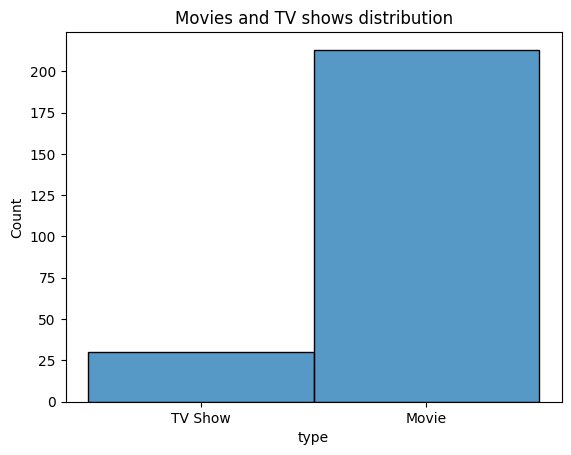

In [164]:
sns.histplot(x='type',data = Africa)
plt.title('Movies and TV shows distribution')
plt.show()

In [165]:
movies_duration = Africa[df['type'] == 'Movie']['Duration'].mean()
movies_duration

<ipython-input-165-97737b4e3ff9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_duration = Africa[df['type'] == 'Movie']['Duration'].mean()


105.49295774647888

In [166]:
tv_shows_duration = Africa[df['type'] == 'TV Show']['Duration'].mean()
tv_shows_duration

<ipython-input-166-acb3d9bf12a9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tv_shows_duration = Africa[df['type'] == 'TV Show']['Duration'].mean()


1.1666666666666667

<Axes: >

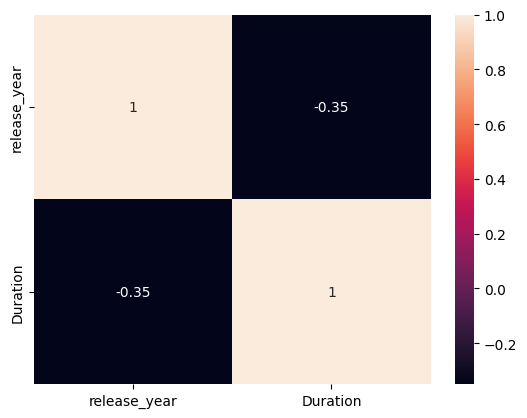

In [167]:
correlation = Africa[['release_year','Duration']].corr()
sns.heatmap(correlation,annot=True)

<Axes: xlabel='release_year', ylabel='Duration'>

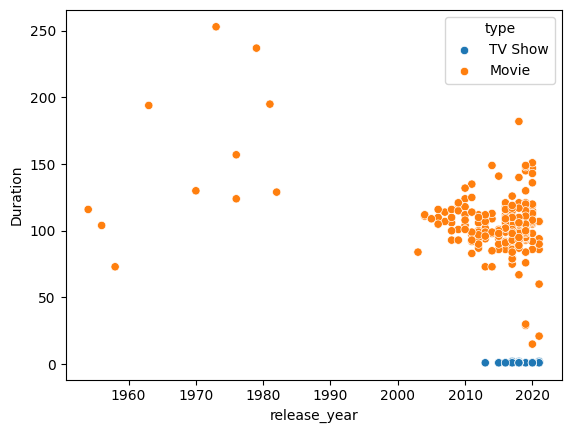

In [168]:
sns.scatterplot(x='release_year',y='Duration',data=Africa,hue='type')

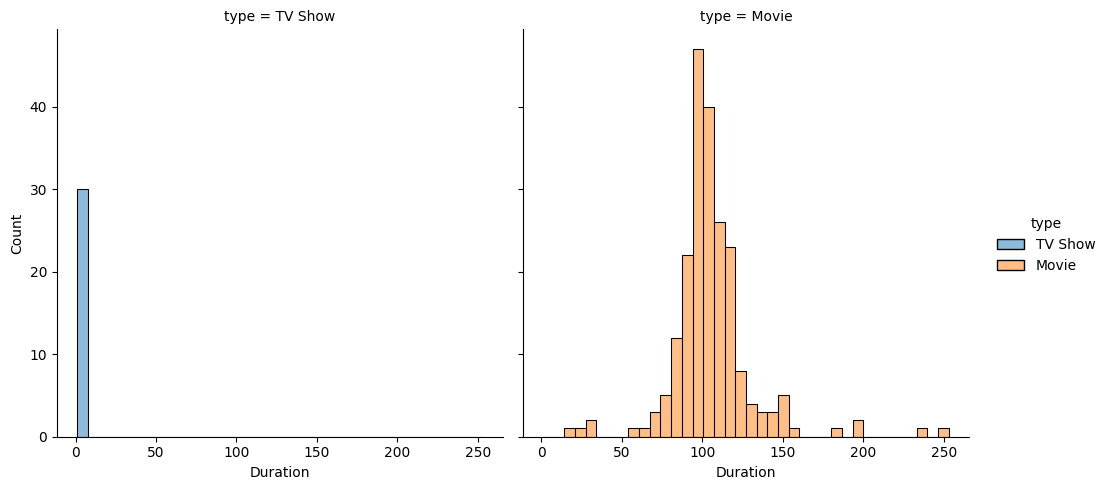

In [169]:
sns.displot(data=Africa, x='Duration',hue='type',col = 'type')

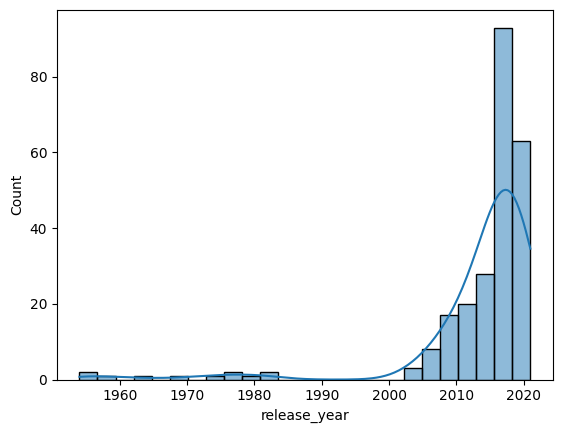

In [170]:
sns.histplot(x='release_year',data = Africa, bins = 25,kde=True)
plt.show()

In [171]:
Africa['date_added']= Africa['date_added'].astype('datetime64[ns]')

<ipython-input-171-0b8f0ce0e4c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa['date_added']= Africa['date_added'].astype('datetime64[ns]')


<ipython-input-172-b0f5c49123ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa['year_added'] = Africa['date_added'].dt.year
<ipython-input-172-b0f5c49123ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa['month_added'] = Africa['date_added'].dt.month


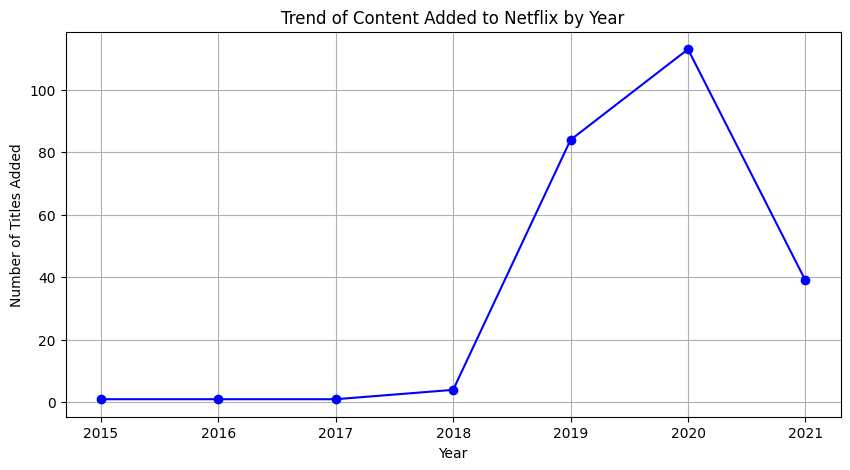

In [172]:
Africa['year_added'] = Africa['date_added'].dt.year
Africa['month_added'] = Africa['date_added'].dt.month

titles_by_year = Africa.groupby('year_added').size()


plt.figure(figsize=(10, 5))
plt.plot(titles_by_year.index, titles_by_year.values, marker='o',color='b')
plt.title("Trend of Content Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

<ipython-input-173-9df786b50d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa['rating'] = Africa['rating'].fillna('Unknown')


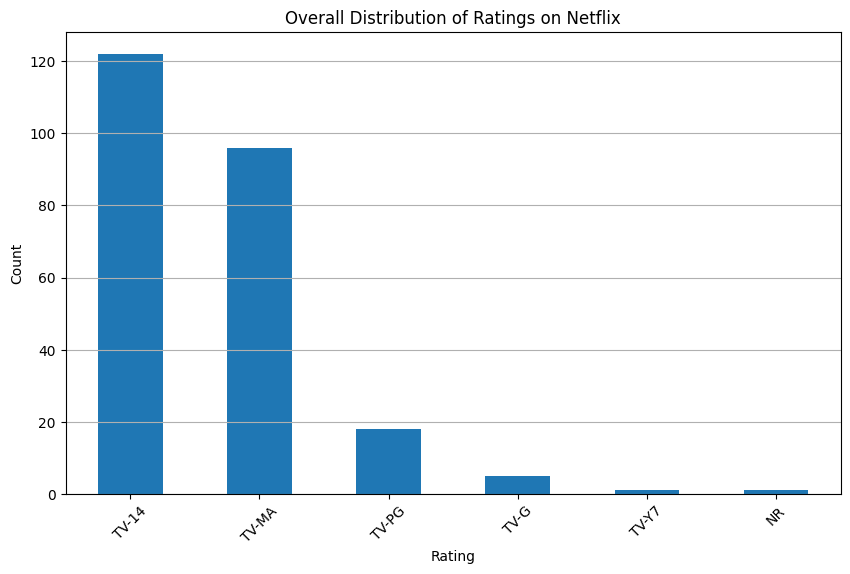

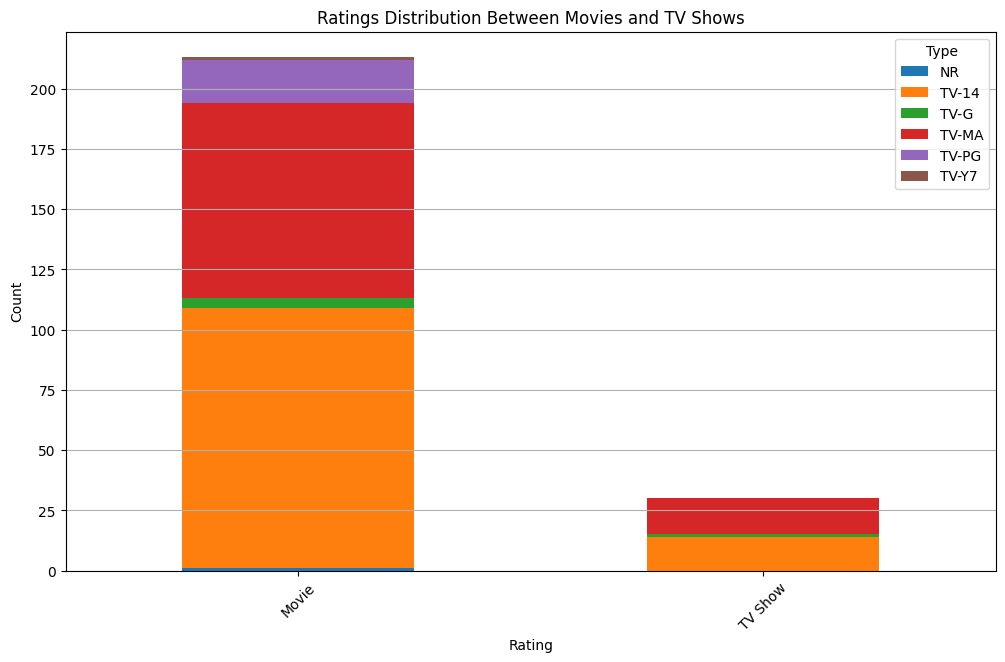

Overall Ratings Distribution:
rating
TV-14    122
TV-MA     96
TV-PG     18
TV-G       5
TV-Y7      1
NR         1
Name: count, dtype: int64

Ratings Distribution Between Movies and TV Shows:
rating   NR  TV-14  TV-G  TV-MA  TV-PG  TV-Y7
type                                         
Movie     1    108     4     81     18      1
TV Show   0     14     1     15      0      0


In [173]:
Africa['rating'] = Africa['rating'].fillna('Unknown')
ratings_distribution = Africa['rating'].value_counts()

ratings_by_type = Africa.groupby(['type', 'rating']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title("Overall Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True,axis='y')
plt.show()

# Plot the distribution by type
ratings_by_type.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Ratings Distribution Between Movies and TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.grid(True,axis='y')
plt.show()

# Display data for inspection
print("Overall Ratings Distribution:")
print(ratings_distribution)
print("\nRatings Distribution Between Movies and TV Shows:")
print(ratings_by_type)

In [174]:
countries_series = Africa['country'].value_counts()
top_10_countries = countries_series.head(10)
print("Top 10 countries producing the most content on Netflix:")
print(top_10_countries)

Top 10 countries producing the most content on Netflix:
country
Egypt           106
Nigeria          95
South Africa     30
Kenya             3
Ghana             3
Mauritius         1
Cameroon          1
Senegal           1
Namibia           1
Mozambique        1
Name: count, dtype: int64


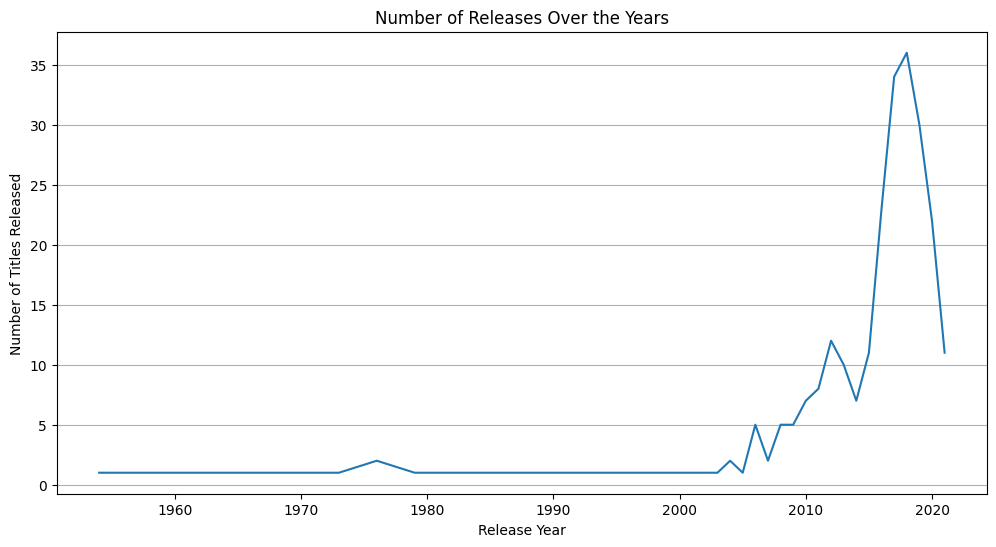

Releases by Year:
release_year
1982     1
2003     1
2004     2
2005     1
2006     5
2007     2
2008     5
2009     5
2010     7
2011     8
2012    12
2013    10
2014     7
2015    11
2016    23
2017    34
2018    36
2019    30
2020    22
2021    11
Name: count, dtype: int64


In [175]:
# Group data by release year and count the number of titles
releases_by_year = Africa['release_year'].value_counts().sort_index()

# Plot the trend over the years
plt.figure(figsize=(12, 6))
plt.plot(releases_by_year.index, releases_by_year.values)
plt.title("Number of Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.grid(axis='y')
plt.show()

# Display the summary for inspection
print("Releases by Year:")
print(releases_by_year.tail(20))

<Figure size 1200x600 with 0 Axes>

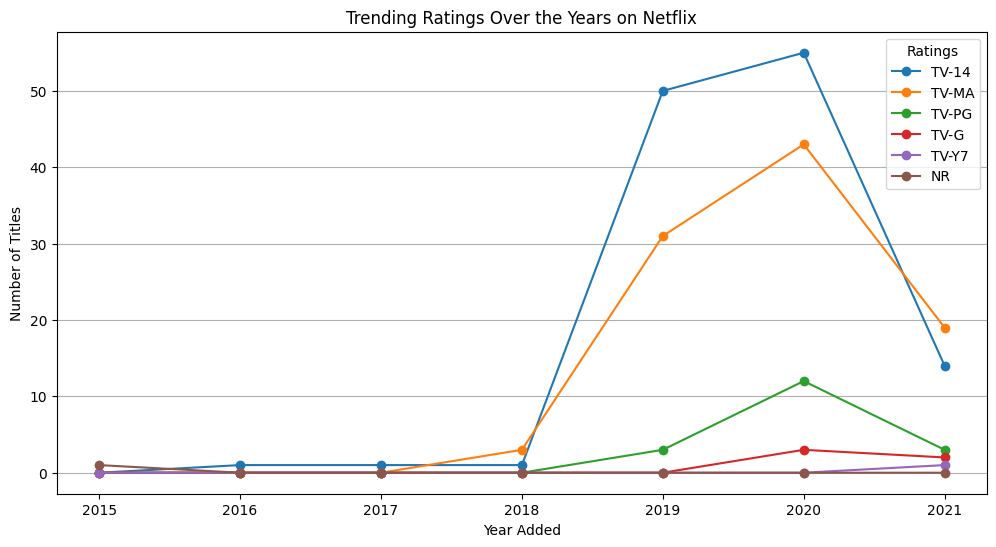

Top Trending Ratings:
rating  year_added  month_added
TV-14   2019        6              13
        2020        5              12
                    6              11
TV-MA   2020        6              10
TV-14   2019        4               9
TV-MA   2019        6               9
TV-14   2020        4               9
        2019        9               7
TV-MA   2020        7               7
        2019        12              6
Name: count, dtype: int64


In [176]:
ratings_trend = Africa.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Find the most popular ratings in recent years
top_ratings = Africa['rating'].value_counts().head(10)

# Plot the overall trend of the most common ratings
plt.figure(figsize=(12, 6))
ratings_trend[top_ratings.index].plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Trending Ratings Over the Years on Netflix")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Ratings")
plt.grid(axis='y')
plt.show()

# Display recent trending ratings
top_ratings_year = Africa[['rating',"year_added",'month_added']].value_counts().head(10)
print("Top Trending Ratings:")
print(top_ratings_year)

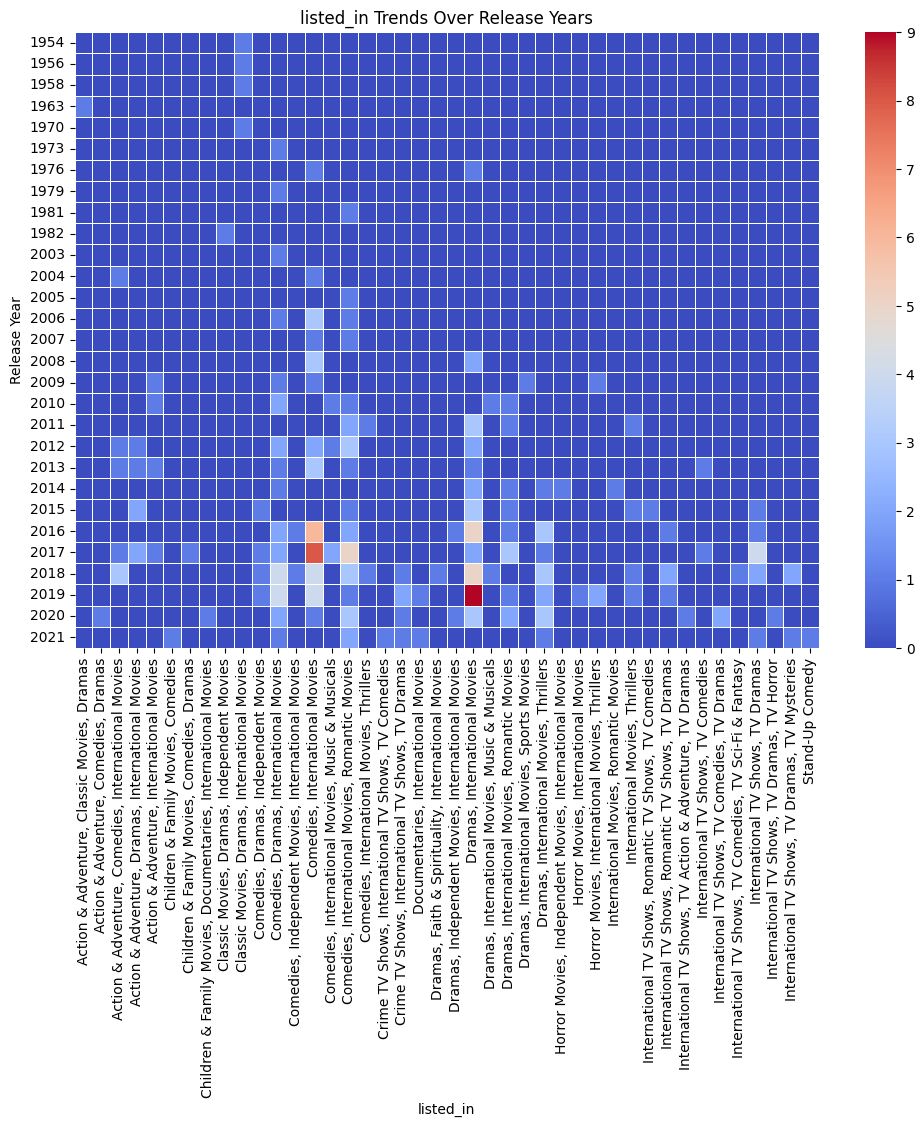

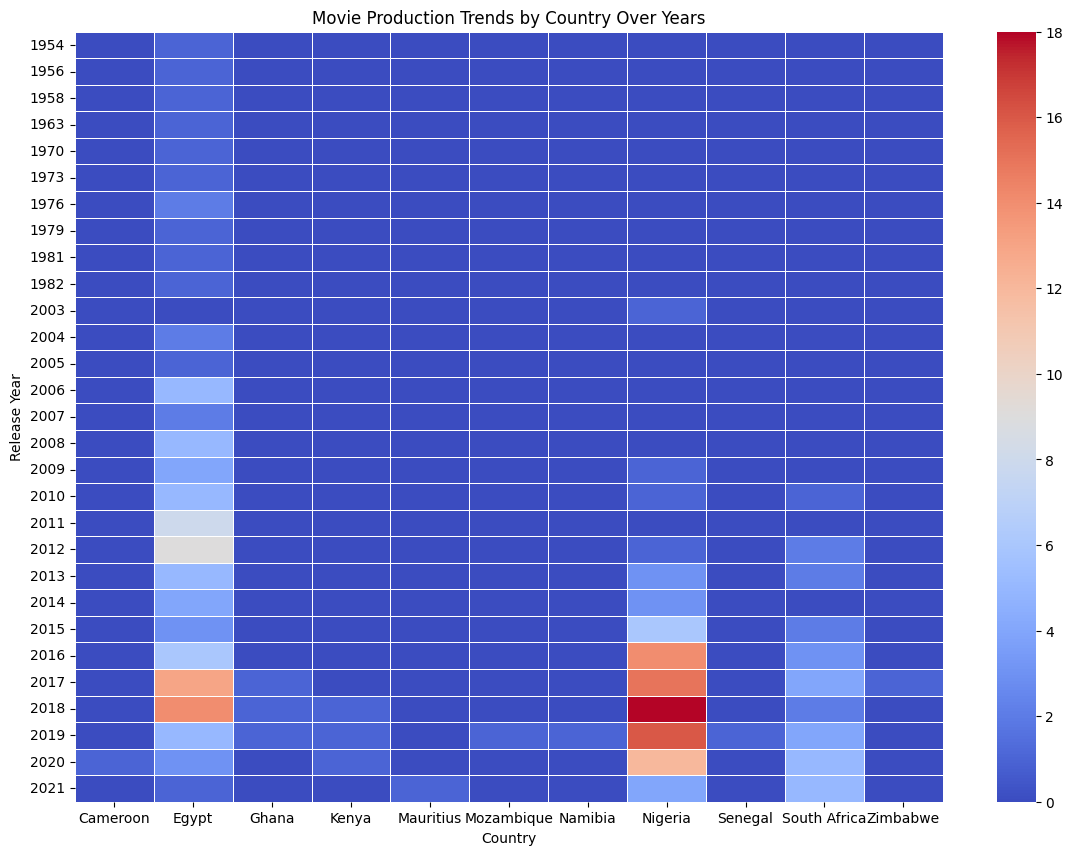

In [177]:
Africa.dropna(subset=['release_year', 'country', 'listed_in'])

# Normalize multiple genres per movie
Africa['listed_in'].str.split(', ')

# Group by country, release year, and genre to count titles
genre_trends = Africa.groupby(['country', 'release_year', 'listed_in']).size().reset_index(name='count')

# Create a pivot table for heatmap visualization
heatmap_data = genre_trends.pivot_table(index='release_year', columns='listed_in', values='count', aggfunc='sum', fill_value=0)

# Plot heatmap of genre trends over years
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title("listed_in Trends Over Release Years")
plt.xlabel("listed_in")
plt.ylabel("Release Year")
plt.show()

# Correlation between release year and number of movies per country
country_trends = Africa.groupby(['release_year', 'country']).size().reset_index(name='count')

# Pivot table for country vs. release year
country_heatmap = country_trends.pivot_table(index='release_year', columns='country', values='count', fill_value=0)

# Plot heatmap for country trends
plt.figure(figsize=(14, 10))
sns.heatmap(country_heatmap, cmap='coolwarm', linewidths=0.5)
plt.title("Movie Production Trends by Country Over Years")
plt.xlabel("Country")
plt.ylabel("Release Year")
plt.show()

In [178]:
#############Asia#################Asia##############Asia

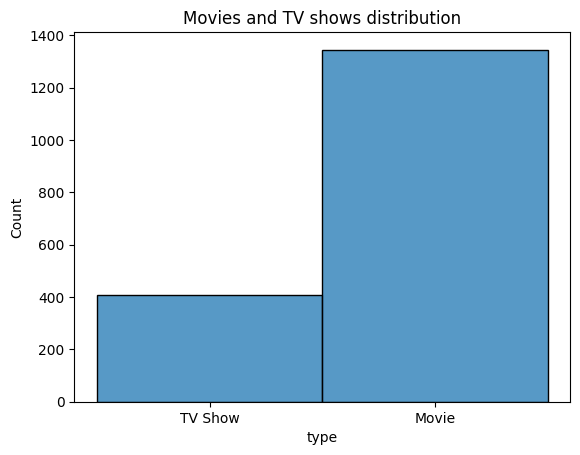

In [179]:
sns.histplot(x='type',data = Asia)
plt.title('Movies and TV shows distribution')
plt.show()

In [180]:
movies_duration = Asia[df['type'] == 'Movie']['Duration'].mean()
movies_duration

<ipython-input-180-99a2e6a9249c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_duration = Asia[df['type'] == 'Movie']['Duration'].mean()


119.88773234200744

In [181]:
tv_shows_duration = Asia[df['type'] == 'TV Show']['Duration'].mean()
tv_shows_duration

<ipython-input-181-fdde687b301f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tv_shows_duration = Asia[df['type'] == 'TV Show']['Duration'].mean()


1.425061425061425

<Axes: >

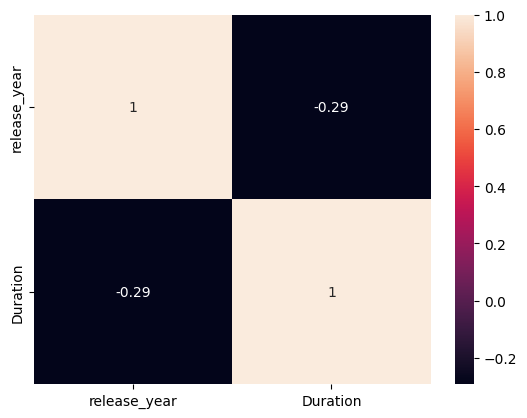

In [182]:
correlation = Asia[['release_year','Duration']].corr()
sns.heatmap(correlation,annot=True)

<Axes: xlabel='release_year', ylabel='Duration'>

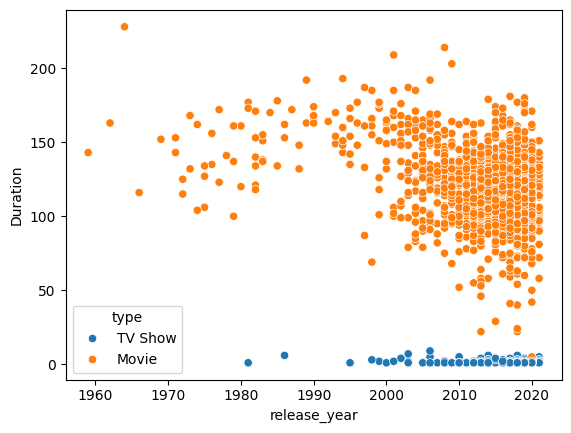

In [183]:
sns.scatterplot(x='release_year',y='Duration',data=Asia,hue='type')

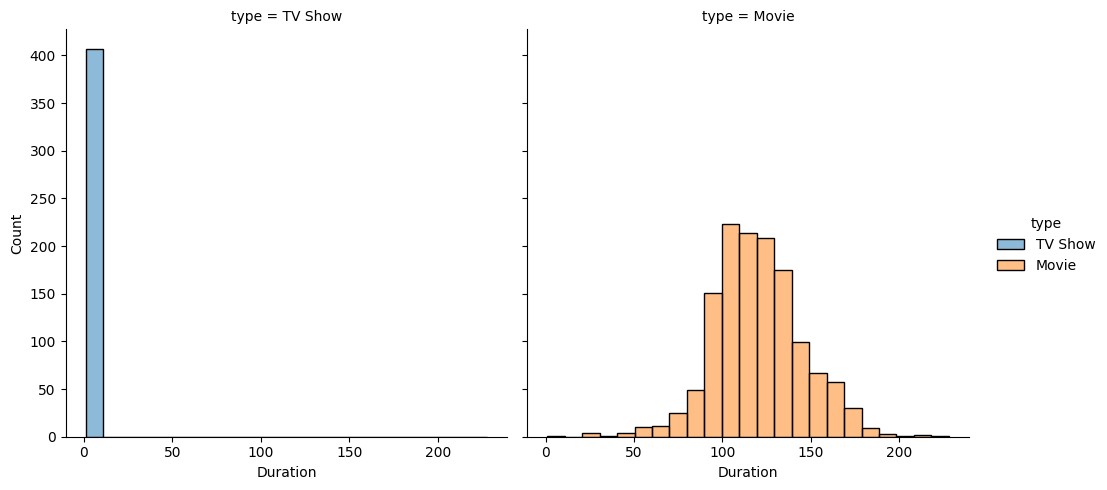

In [184]:
sns.displot(data=Asia, x='Duration',hue='type',col = 'type')

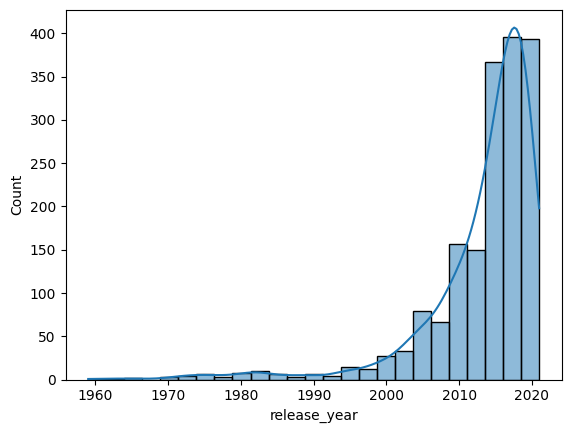

In [185]:
sns.histplot(x='release_year',data = Asia, bins = 25,kde=True)
plt.show()

In [186]:
Asia['date_added']= Asia['date_added'].astype('datetime64[ns]')

<ipython-input-186-53d74e236e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Asia['date_added']= Asia['date_added'].astype('datetime64[ns]')


<ipython-input-187-17b68e9c3b10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Asia['year_added'] = Asia['date_added'].dt.year
<ipython-input-187-17b68e9c3b10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Asia['month_added'] = Asia['date_added'].dt.month


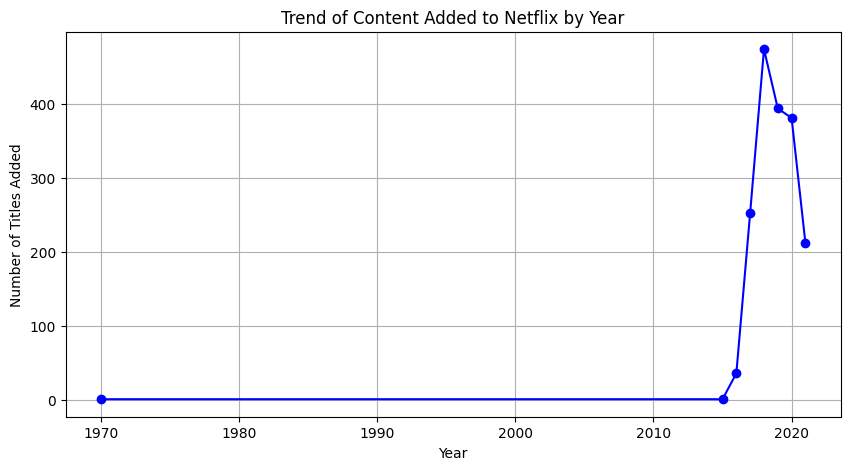

In [187]:
Asia['year_added'] = Asia['date_added'].dt.year
Asia['month_added'] = Asia['date_added'].dt.month

titles_by_year = Asia.groupby('year_added').size()


plt.figure(figsize=(10, 5))
plt.plot(titles_by_year.index, titles_by_year.values, marker='o',color='b')
plt.title("Trend of Content Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

<ipython-input-188-130662022792>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Asia['rating'] = Asia['rating'].fillna('Unknown')


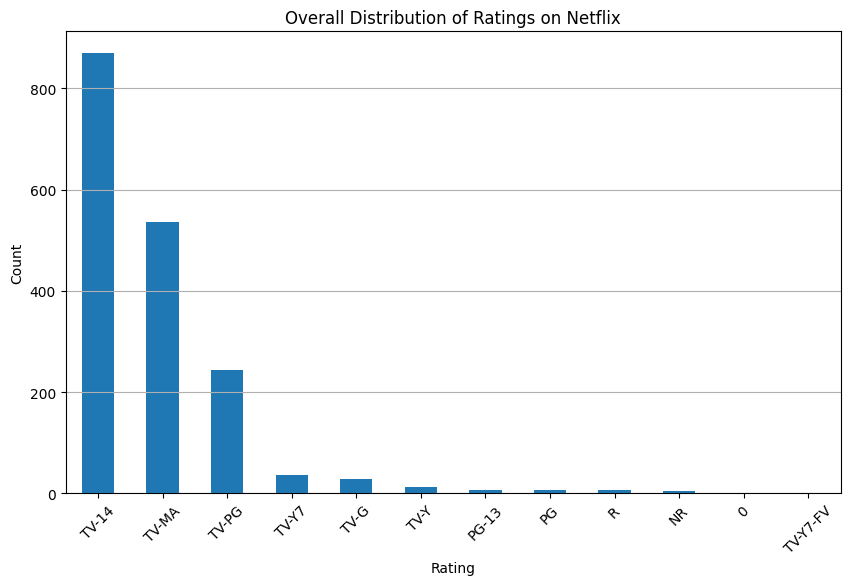

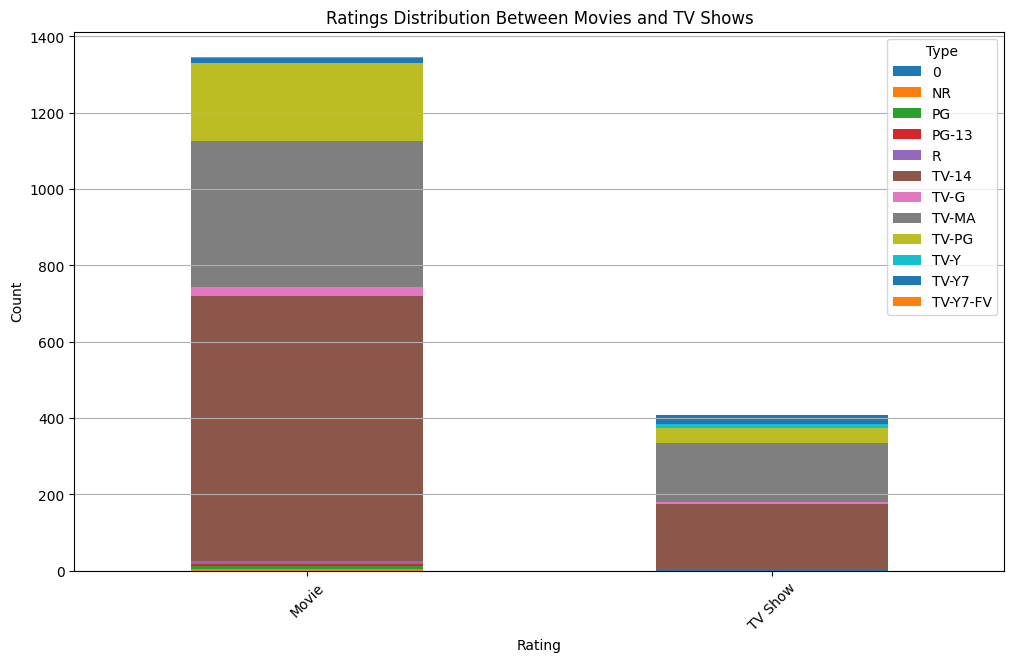

Overall Ratings Distribution:
rating
TV-14       869
TV-MA       536
TV-PG       244
TV-Y7        36
TV-G         29
TV-Y         12
PG-13         7
PG            6
R             6
NR            5
0             1
TV-Y7-FV      1
Name: count, dtype: int64

Ratings Distribution Between Movies and TV Shows:
rating   0  NR  PG  PG-13  R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV
type                                                                          
Movie    0   5   6      7  6    696    23    383    204     1     13         1
TV Show  1   0   0      0  0    173     6    153     40    11     23         0


In [188]:
Asia['rating'] = Asia['rating'].fillna('Unknown')
ratings_distribution = Asia['rating'].value_counts()

ratings_by_type = Asia.groupby(['type', 'rating']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title("Overall Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True,axis='y')
plt.show()

# Plot the distribution by type
ratings_by_type.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Ratings Distribution Between Movies and TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.grid(True,axis='y')
plt.show()

# Display data for inspection
print("Overall Ratings Distribution:")
print(ratings_distribution)
print("\nRatings Distribution Between Movies and TV Shows:")
print(ratings_by_type)

In [189]:
countries_series = Asia['country'].value_counts()
top_10_countries = countries_series.head(10)
print("Top 10 countries producing the most content on Netflix:")
print(top_10_countries)

Top 10 countries producing the most content on Netflix:
country
India          972
Japan          245
Turkey         105
Indonesia       79
Philippines     75
China           66
Thailand        61
Singapore       23
Malaysia        22
Pakistan        18
Name: count, dtype: int64


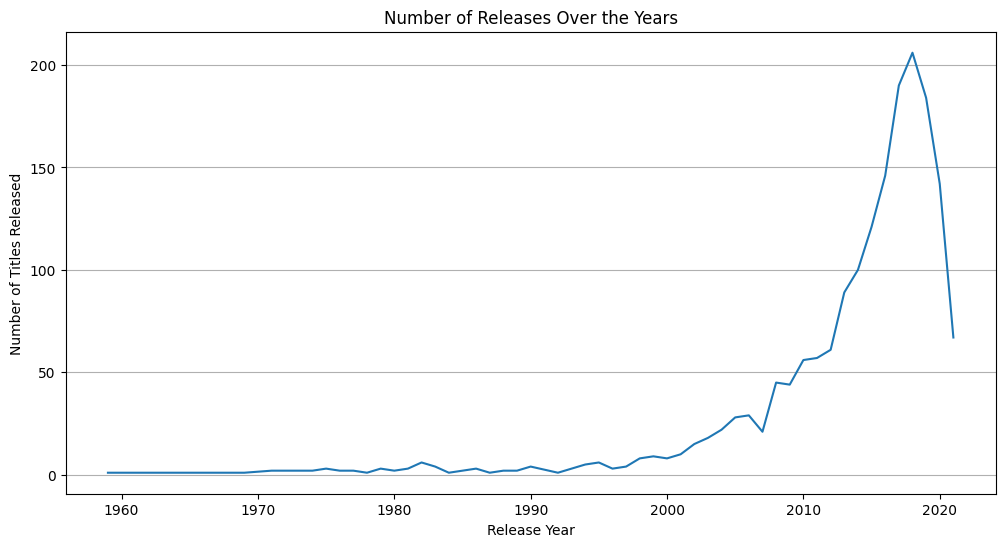

Releases by Year:
release_year
2002     15
2003     18
2004     22
2005     28
2006     29
2007     21
2008     45
2009     44
2010     56
2011     57
2012     61
2013     89
2014    100
2015    121
2016    146
2017    190
2018    206
2019    184
2020    142
2021     67
Name: count, dtype: int64


In [190]:
# Group data by release year and count the number of titles
releases_by_year = Asia['release_year'].value_counts().sort_index()

# Plot the trend over the years
plt.figure(figsize=(12, 6))
plt.plot(releases_by_year.index, releases_by_year.values)
plt.title("Number of Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.grid(axis='y')
plt.show()

# Display the summary for inspection
print("Releases by Year:")
print(releases_by_year.tail(20))

<Figure size 1200x600 with 0 Axes>

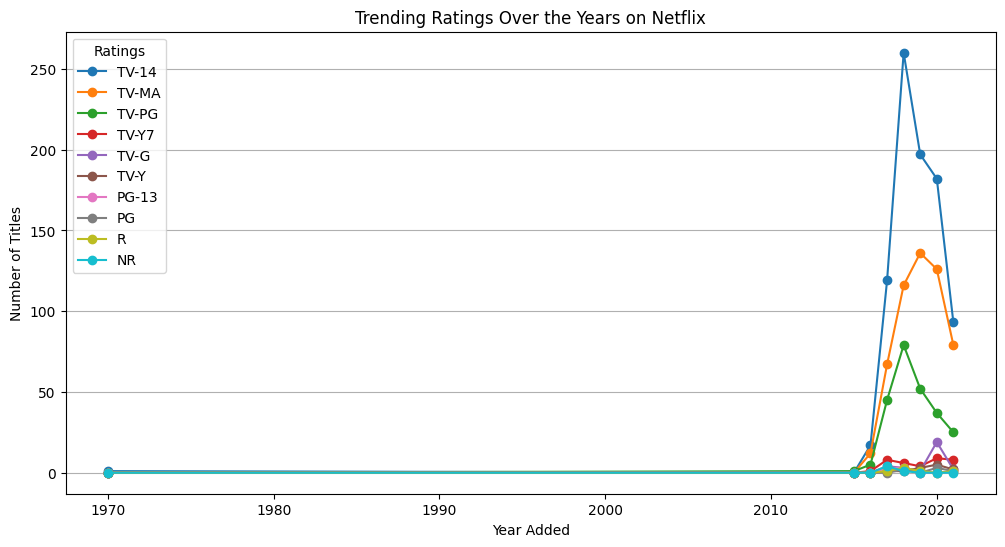

Top Trending Ratings:
rating    year_added  month_added
TV-14     2019        12             55
          2018        10             48
                      3              35
          2020        4              34
          2018        8              33
                                     ..
TV-G      2018        3               1
                      1               1
          2017        11              1
                      9               1
TV-Y7-FV  2017        7               1
Name: count, Length: 262, dtype: int64


In [191]:
ratings_trend = Asia.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Find the most popular ratings in recent years
top_ratings = Asia['rating'].value_counts().head(10)

# Plot the overall trend of the most common ratings
plt.figure(figsize=(12, 6))
ratings_trend[top_ratings.index].plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Trending Ratings Over the Years on Netflix")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Ratings")
plt.grid(axis='y')
plt.show()

# Display recent trending ratings
top_ratings_year = Asia[['rating',"year_added",'month_added']].value_counts()
print("Top Trending Ratings:")
print(top_ratings_year)

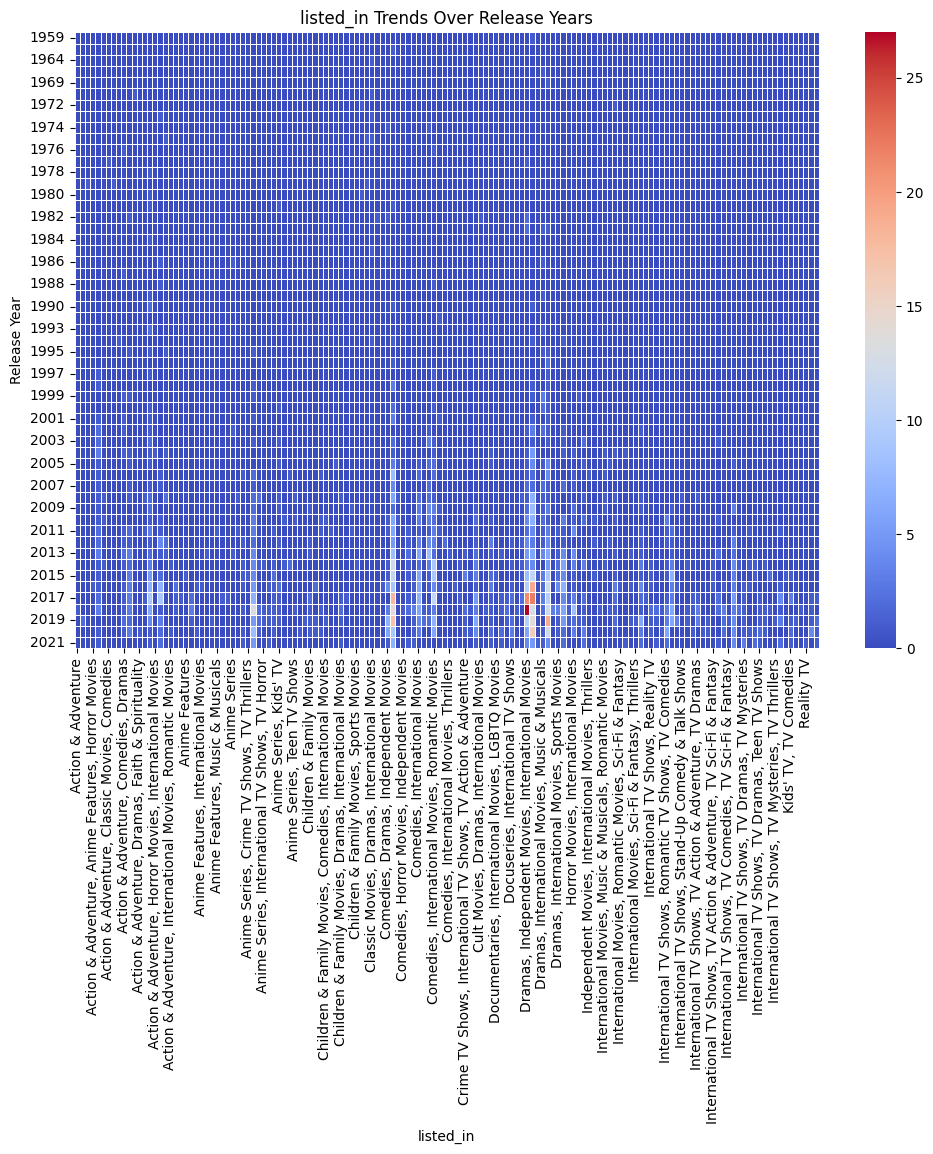

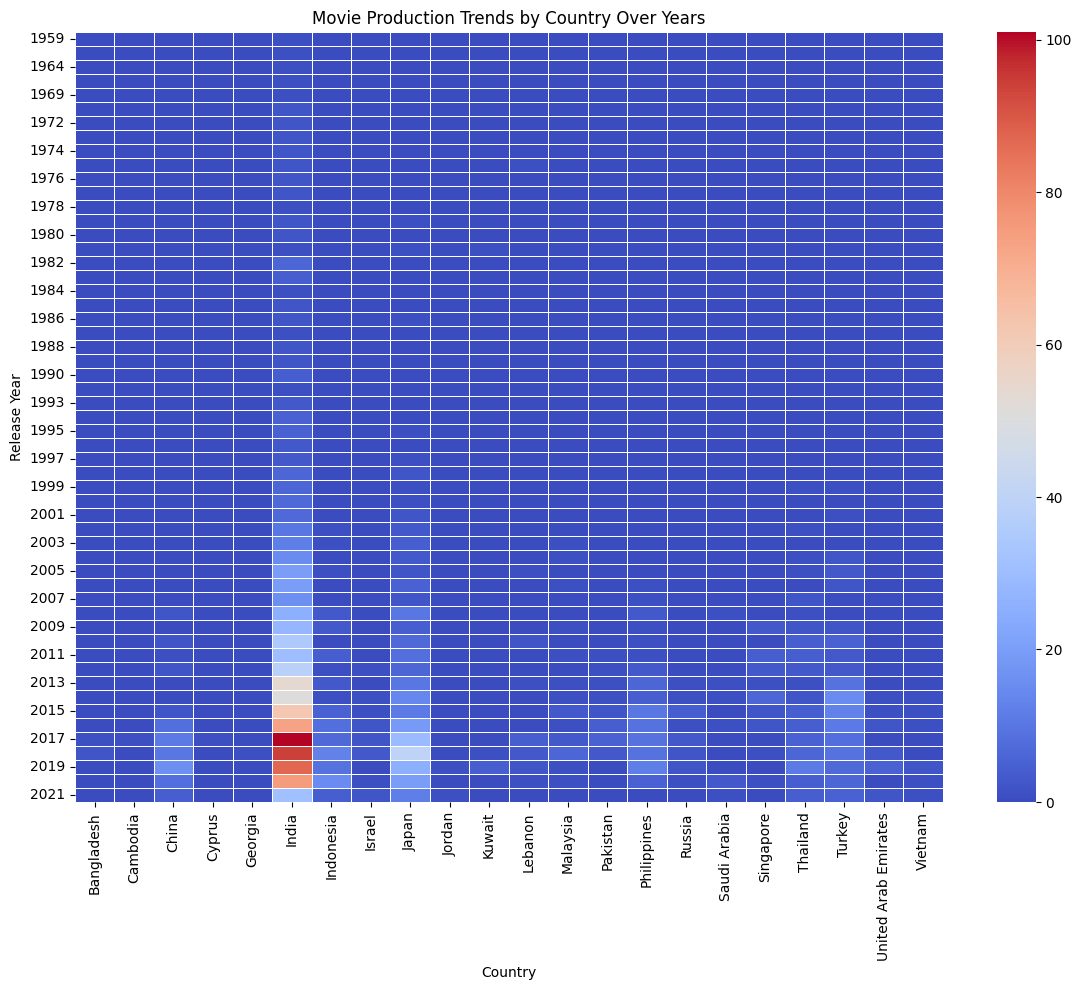

In [192]:
Asia.dropna(subset=['release_year', 'country', 'listed_in'])

# Normalize multiple genres per movie
Asia['listed_in'].str.split(', ')

# Group by country, release year, and genre to count titles
genre_trends = Asia.groupby(['country', 'release_year', 'listed_in']).size().reset_index(name='count')

# Create a pivot table for heatmap visualization
heatmap_data = genre_trends.pivot_table(index='release_year', columns='listed_in', values='count', aggfunc='sum', fill_value=0)

# Plot heatmap of genre trends over years
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title("listed_in Trends Over Release Years")
plt.xlabel("listed_in")
plt.ylabel("Release Year")
plt.show()

# Correlation between release year and number of movies per country
country_trends = Asia.groupby(['release_year', 'country']).size().reset_index(name='count')

# Pivot table for country vs. release year
country_heatmap = country_trends.pivot_table(index='release_year', columns='country', values='count', fill_value=0)

# Plot heatmap for country trends
plt.figure(figsize=(14, 10))
sns.heatmap(country_heatmap, cmap='coolwarm', linewidths=0.5)
plt.title("Movie Production Trends by Country Over Years")
plt.xlabel("Country")
plt.ylabel("Release Year")
plt.show()